Project Notes:
- Dataset: https://www.kaggle.com/prachi13/customer-analytics
- How to export google colab as html: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab

# Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches, rcParams
from scipy import stats

In [2]:
# rcParams['figure.figsize'] = (8,5)
# rcParams['lines.linewidth'] = 2.5
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'
# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
custom_params = {
    'figure.figsize':(8,5),
    'lines.linewidth':2.5,
    'axes.titlesize':20,
    'axes.labelsize':16,
    'xtick.labelsize':14,
    'ytick.labelsize':14,
    'axes.spines.right':False,
    'axes.spines.top':False
}
sns.set_theme(style='ticks', font_scale=1.25, context='notebook', rc=custom_params, palette='Set2')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# colors
red = '#E33131'
blue = '#3772FF'
gray = '#C0C5C1'
darkgray = '#858786'
yellow = '#F5D491'
orange = '#E89005'
black = '#080708'
white = '#FEFFFE'
green = '#4CB944'

In [5]:
url = 'https://raw.githubusercontent.com/fnurrahmadi/data-science-portfolio/main/E-Commerce%20Shipping%20Data/csv/Train.csv'

# Data Overview

In [6]:
df = pd.read_csv(url)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
columns = [col.lower() if col!='Reached.on.Time_Y.N' else 'late_delivery' for col in df.columns]
df.columns = columns
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'product_importance', 'gender', 'discount_offered', 'weight_in_gms', 'late_delivery'], dtype='object')

Untuk memudahkan penggunaan kolom-kolom yang ada, semua kolom dibuat menjadi lowercase, dan kolom yang ambigu diubah menjadi lebih jelas. Jadi, kolom dari dataset ini menjadi:

- id
- warehouse_block
- mode_of_shipment
- customer_care_calls
- customer_rating
- cost_of_the_product
- prior_purchases
- product_importance
- gender
- discount_offered
- weight_in_gms
- late_delivery

Pada variabel target kita yakni late_delivery, berikut adalah penjelasan valuenya:
- 1 == did not reach on time
- 0 == reached on time

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  late_delivery        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
late_delivery          0
dtype: int64

In [11]:
nums = [col for col in df.columns if (df[col].dtype != 'O') and (col not in ['id'])]
cats = [col for col in df.columns if df[col].dtype == 'O']
print('Numerical:',nums)
print('Categorical:',cats)

Numerical: ['customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms', 'late_delivery']
Categorical: ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']


In [12]:
df[nums].describe()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [13]:
df[cats].describe()

,warehouse_block,mode_of_shipment,product_importance,gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [14]:
for col in cats:
  print(col,':')
  print(df[col].value_counts(dropna=False),'\n')

warehouse_block :
F    3666
D    1834
A    1833
B    1833
C    1833
Name: warehouse_block, dtype: int64 

mode_of_shipment :
Ship      7462
Flight    1777
Road      1760
Name: mode_of_shipment, dtype: int64 

product_importance :
low       5297
medium    4754
high       948
Name: product_importance, dtype: int64 

gender :
F    5545
M    5454
Name: gender, dtype: int64 



Hasil observasi dari descriptive statistics:
- Tidak ada kolom yang tipe datanya salah.
- Terdapat sebanyak 10999 rows dan tidak ada data yang null.
- Dari kolom numerikal, tidak terdapat nilai yang isinya salah, karena tipe data integer sudah menandakan bahwa semua datanya sudah numerik.
- Dari kolom categorical, value counts menunjukkan bahwa setiap unique value masuk akal dan tidak ada yang salah.
- Baik dari kolom numerikal maupun kolom kategorikal, tidak ada nilai summary yang tidak masuk akal.

Insights dari descriptive statistics:
- Kolom **Customer_care_calls** dan **Customer_rating** terlihat distribusinya cukup simterik (*Mean* dan *Median* tidak berbeda jauh).
- Kolom **Prior_purchases** dan **Discount_offered** terlihat Positively Skewd.
- Kolom **Reached.on.Time_Y.N** bernilai boolean.
- **Mode_of_Shipment** paling banyak dilakukan dengan melewati jalur laut *(ship)* sebanyak 7462.
- **Warehouse_block** untuk pengiriman paling banyak dari *Warehouse F* sebanyak 3666.
- **Product_importance** paling banyak dengan kategori *Low* sebanyak 5297.
- **Gender** paling banyak melakukan transaksi berasal dari *Female* sebanyak 5545.

# EDA

## Univariate Analysis

### Numerical

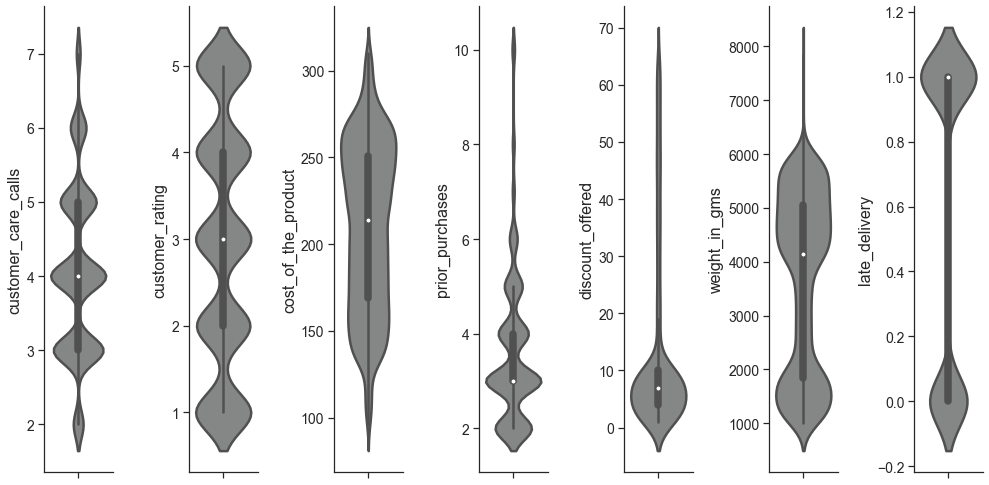

In [15]:
plt.figure(figsize=(14,7))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color=darkgray, orient='v')
    plt.tight_layout()

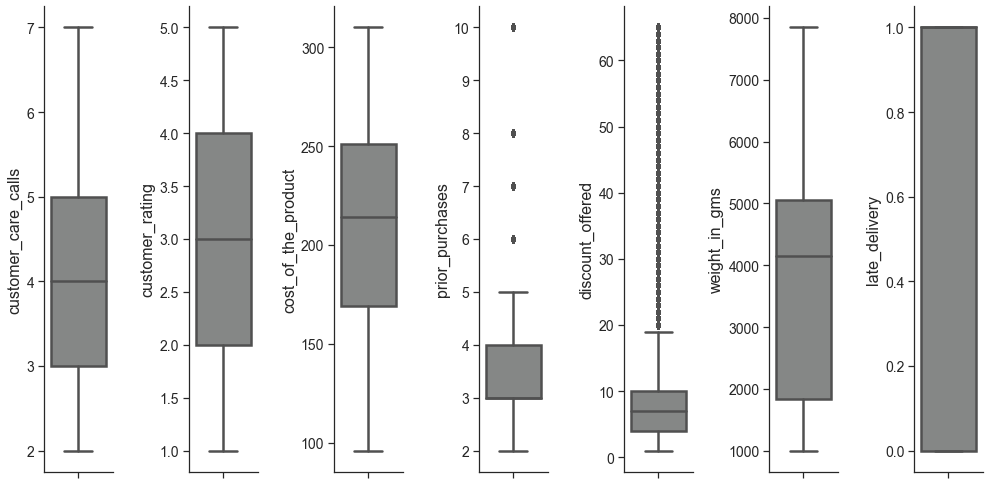

In [16]:
features = nums
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color=darkgray, orient='v')
  plt.tight_layout()

Insight:
- Terdapat outlier pada kolom `Prior_purchases` dan `Discount_offered`

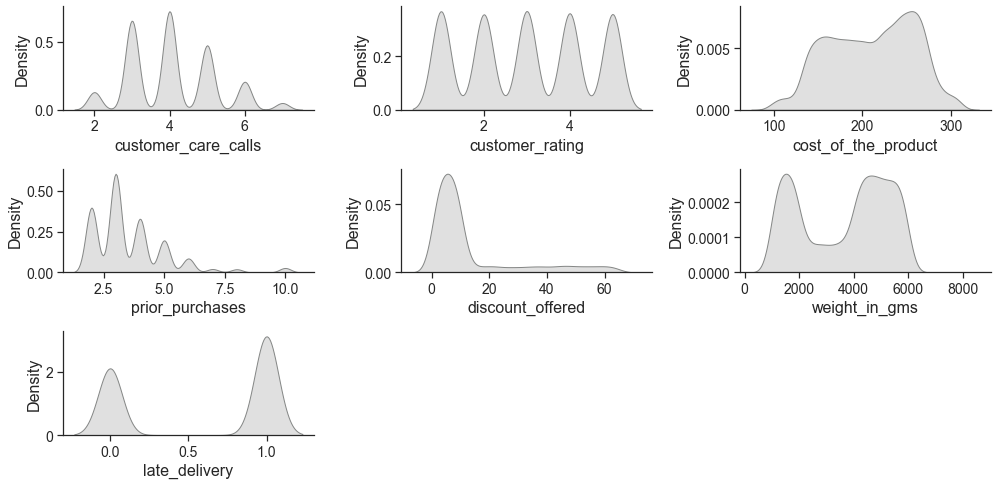

In [17]:
features = nums
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(x=df[features[i]], color=darkgray, fill=True)
  plt.xlabel(features[i])
  plt.tight_layout()

Insight:
- Terlihat bahwa kolom `Prior_purchases` cenderung skew ke kanan dan kolom `Discount_offered` skew ke kanan dengan buntut panjang
- Kita juga tahu bahwa pada kolom `Reached.on.Time_Y.N` barang yang tidak sampai tepat waktu lebih banyak di banding yang tepat waktu
- `Customer_care_calls` memiliki mode pada angka 4 dan cenderung skew ke kanan
- `Customer_rating` memiliki distribusi uniform
- `Cost_of_the_product` dan `Weight_in_gms` memiliki distribusi bimodal

Notes untuk data preprocessing:
- `Prior_purchases` dan `discount_offered` dapat ditransformasi menggunakan log/sqrt transformation karena positively skewed
- `Cost_of_the_product` dan `Weight_in_gms` yang memiliki distribusi bimodal --> ditransformasi dengan tujuan mendapatkan feature importance score yang lebih bagus

### Categorical

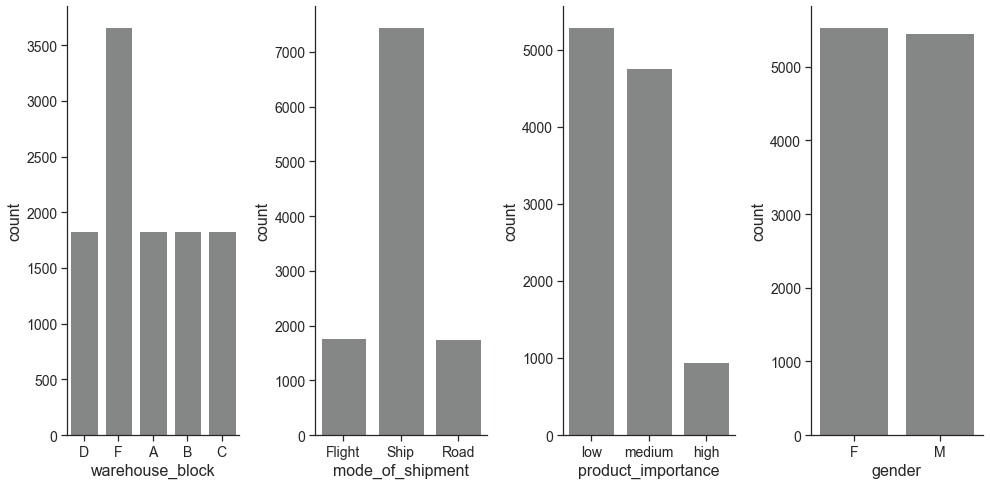

In [18]:
features = cats
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color=darkgray)
plt.tight_layout()

Insight:
- `Warehouse_block` F memiliki shipment paling banyak
- Ship adalah `mode_of_shipment` yang paling sering digunakan
- Pada `product_importance`, low adalah yang paling banyak, lalu medium, dan baru high, dengan jumlah yang sangat sedikit jika dibandingkan dengan low dan medium lainnya
- Secara `gender`, tidak ada perbedaan jumlah shipment

## Multivariate Analysis

<AxesSubplot:>

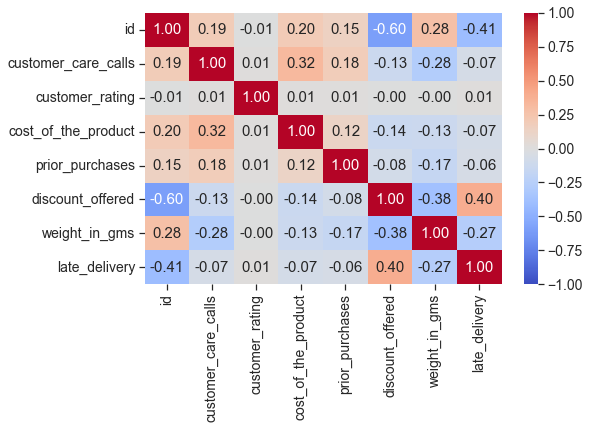

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f')

Insight:
- `id` memiliki korelasi negatif dengan target `late delivery` yaitu sebesar -0.41
- `discount_offered` memiliki korelasi positif dengan target `late delivery` yaitu sebesar 0.40
- `weight_in_gms` memiliki korelasi negatif dengan target `late delivery` yaitu sebesar -0.27

In [20]:
nums

['customer_care_calls',
 'customer_rating',
 'cost_of_the_product',
 'prior_purchases',
 'discount_offered',
 'weight_in_gms',
 'late_delivery']

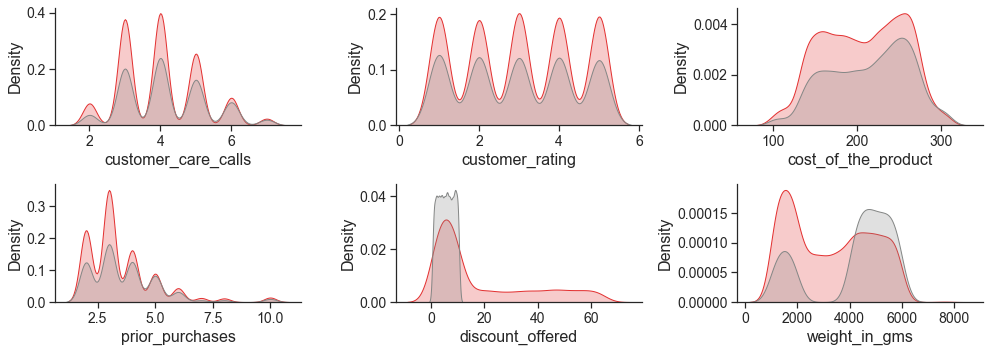

In [21]:
features = [col for col in nums if col not in ['late_delivery']]
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(data=df, x=df[features[i]], hue='late_delivery', palette=[darkgray, red], legend=False, fill=True)
  plt.tight_layout()

Merah menunjukkan Late delivery, dan Abu-Abu menunjukkan On-time delivery

Insight:
- Shipment dengan `cost_of_the_product` pada sekitar 150 cenderung untuk late dibanding on time
- `discount_offered` lebih tinggi untuk late delivery
- `weight_in_gms` yang ringan cenderung untuk telat dibanding yang berat

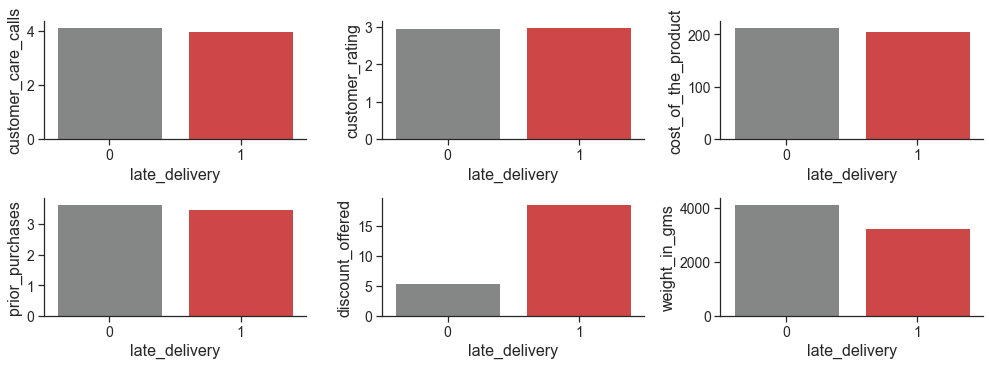

In [22]:
features = [col for col in nums if col not in ['late_delivery']]
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=df, x='late_delivery', y=df[features[i]], palette=[darkgray, red], ci=None)
    plt.tight_layout()

Jika kolom numerikal dirata-ratakan berdasarkan late dan on-time delivery, berikut adalah insightnya:
- Perbedaan rata-rata terlihat paling jelas pada `discount_offered` dan `weight_in_gms`
- Terlihat perbedaan yang sangat kecil pada `cost_of_the_product`, `prior_purchases`, dan `customer_care_calls`

In [23]:
cats

['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']

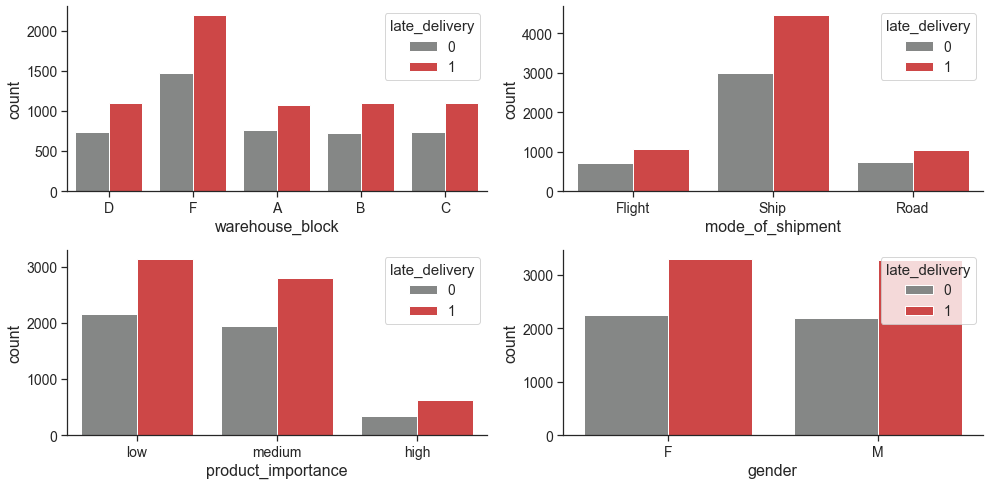

In [24]:
features = cats
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=df[features[i]], hue='late_delivery', palette=[darkgray, red])
    plt.tight_layout()

Insight:
- Warehouse block F memiliki late delivery paling banyak diantara semua warehouse block
- Ship memiliki late delivery paling banyak dari semua mode shipment
- Terdapat late delivery paling banyak di low product importance, lalu medium
- Secara gender, tidak ada beda jumlah late delivery

<Figure size 576x576 with 0 Axes>

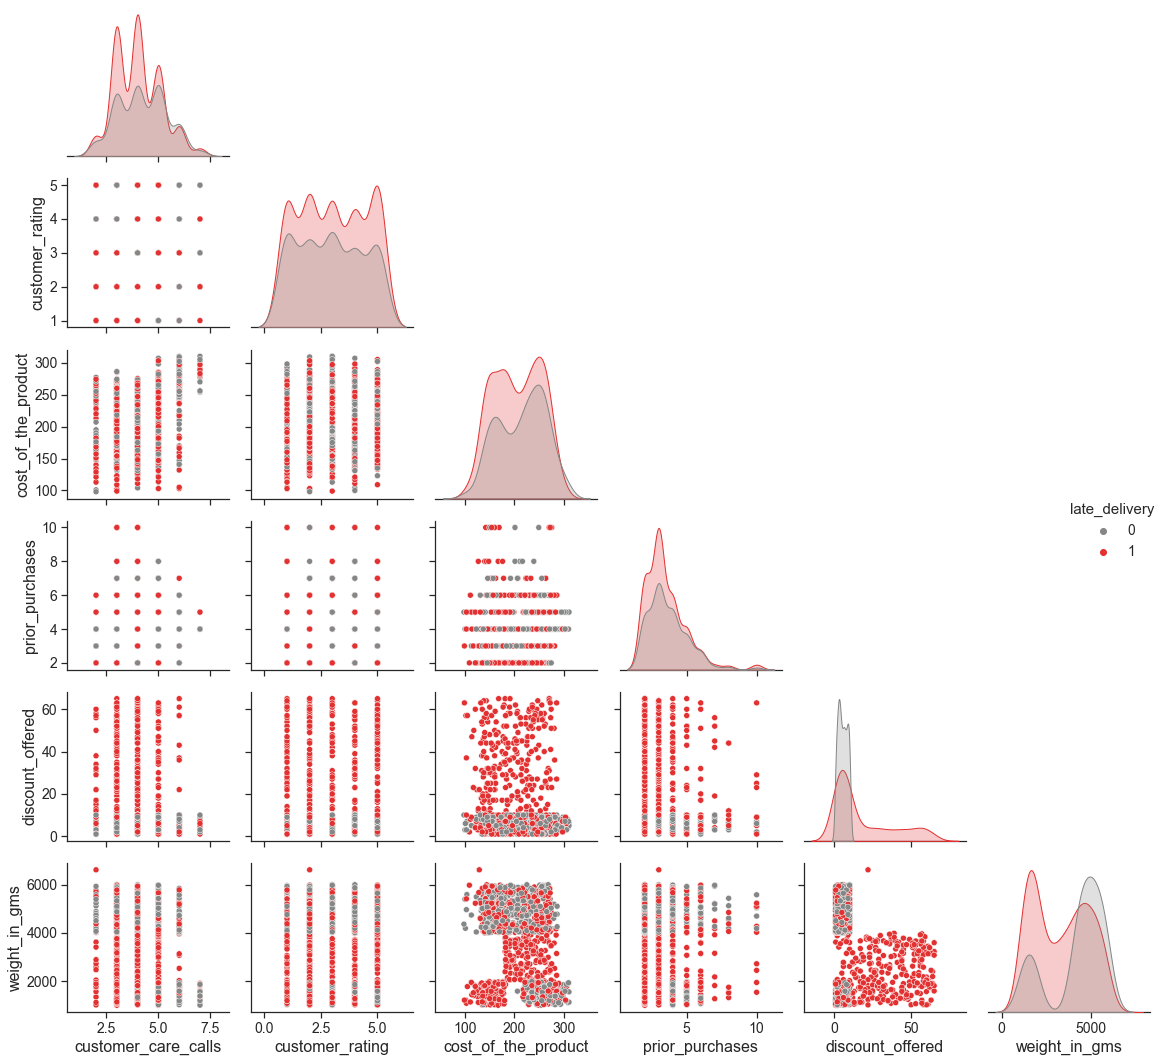

In [25]:
features = [col for col in nums if col not in ['id']]
plt.figure(figsize=(8, 8))
sns.pairplot(df[features].sample(frac=0.1), diag_kind='kde', palette=[darkgray, red], hue='late_delivery', corner=True)
plt.tight_layout()
plt.show()

Insight:
- beberapa feature yang memiliki korelasi cukup kuat dengan target `late_delivery` adalah discount_offered
- secara umum, tidak ada antar feature yang memiliki korelasi yang kuat

In [26]:
dfg = df.groupby(['late_delivery',]).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
              nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery                                                                                                                                                          
0                4436        3.670424    3.0          214.498647  222.0         5.545987    6.0   4168.668395  4674.0        2.967989    3.0            4.147656    4.0
1                6563        3.498095    3.0          207.289197  209.0        18.663721    9.0   3272.640104  3231.0        3.005790    3.0            3.991467    4.0

Insight:
- Kemungkinan cost of product sudah termasuk discount offered, karena cost of product semakin rendah, discount semakin tinggi
- Weight in gms untuk barang yang on time justru lebih ringan daripada barang yang late

In [27]:
dfg = df.groupby(['late_delivery','gender']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                     nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery gender                                                                                                                                                          
0             F         2249        3.670076    3.0          213.952868  220.0         5.583370    6.0   4169.104046  4677.0        2.943975    3.0            4.148066    4.0
              M         2187        3.670782    3.0          215.059899  223.0         5.507545    5.0   4168.220393  4668.0        2.992684    3.0            4.147234    4.0
1             F         3296        3.521541    3.0          206.049454  207.0        19.006978    9.0   3259.155947  3151.5        3.015777    3.0            3.985740    4.0
              M         3267        3.474441    3.0          208.539945  212.0        18.317417    9.0   3286.243955  3307.0        2.995715    3.0            3.997245    4.0

Insight:
- Tidak jauh perbedaan antara Male dan Female, ketika dibedakan late delivery dan on time delivery

In [28]:
dfg = df.groupby(['late_delivery','warehouse_block']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                              nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery warehouse_block                                                                                                                                                          
0             A                   758        3.630607    3.0          214.216359  223.0         5.526385    5.0   4140.250660  4661.0        2.930079    3.0            4.171504    4.0
              B                   729        3.758573    3.0          216.736626  224.0         5.577503    6.0   4183.167353  4686.0        2.980796    3.0            4.083676    4.0
              C                   739        3.607578    3.0          214.654939  221.0         5.430311    5.0   4177.474966  4638.0        2.956698    3.0            4.148850    4.0
              D                   738        3.772358    4.0          214.563686  219.0         5.604336    6.0   4130.554201  4632.0        3.033875    3.0            4.146341    4.0
              F                  1472        3.627717    3.0          213.424592  222.0         5.569293    6.0   4190.809103  4724.0        2.953804    3.0            4.167120    4.0
1             A                  1075        3.540465    3.0          204.925581  205.0        18.649302    9.0   3245.402791  3185.0        2.976744    3.0            3.944186    4.0
              B                  1104        3.453804    3.0          209.136775  213.0        18.211957    9.0   3274.194746  3213.0        2.980072    3.0            3.978261    4.0
              C                  1094        3.519196    3.0          208.851920  209.0        18.783364    9.0   3279.164534  3181.0        3.019196    3.0            4.008227    4.0
              D                  1096        3.487226    3.0          208.446168  212.0        18.136861    9.0   3291.018248  3287.0        3.007299    3.0            3.990876    4.0
              F                  2194        3.494531    3.0          206.160438  208.0        19.101641    9.0   3272.769371  3235.0        3.025524    3.0            4.013218    4.0

Insight:
- Warehouse block F memiliki shipment terbanyak, mau late atau tidak
- Warehouse selain F memiliki angka shipment dan nilai-nilai yang serupa
- Pada setiap warehouse, rasio late delivery serupa

In [29]:
dfg = df.groupby(['late_delivery','mode_of_shipment']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                               nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery mode_of_shipment                                                                                                                                                          
0             Flight               708        3.738701    3.0          213.408192  222.0         5.528249    6.0   4116.878531  4631.5        2.975989    3.0            4.182203    4.0
              Road                 725        3.689655    3.0          215.394483  222.0         5.466207    5.0   4122.776552  4632.0        2.988966    3.0            4.211034    4.0
              Ship                3003        3.649684    3.0          214.539461  221.0         5.569431    6.0   4191.958042  4704.0        2.961039    3.0            4.124209    4.0
1             Flight              1069        3.452760    3.0          206.590271  209.0        18.216090    9.0   3306.506080  3372.0        2.986904    3.0            4.052385    4.0
              Road                1035        3.505314    3.0          207.029952  208.0        18.420290    9.0   3318.063768  3236.0        3.000000    3.0            3.959420    4.0
              Ship                4459        3.507289    3.0          207.516932  210.0        18.827540    9.0   3253.977573  3181.0        3.011662    3.0            3.984301    4.0

Insight:
- Mode shipment Ship digunakan paling banyak, mau late atau tidak
- Flight dan road memiliki nilai yang kurang lebih sama
- Rasio late delivery pada setiap shipment mode serupa

In [30]:
dfg = df.groupby(['late_delivery','product_importance']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                                 nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery product_importance                                                                                                                                                          
0             high                   332        3.813253    3.0          207.530120  211.0         5.207831    5.0   4788.722892  4923.5        2.990964    3.0            3.885542    4.0
              low                   2157        3.639777    3.0          216.759388  224.0         5.618452    6.0   4002.271210  4625.0        2.991655    3.0            4.231803    4.0
              medium                1947        3.680021    3.0          213.182332  220.0         5.523369    6.0   4247.281972  4677.0        2.937853    3.0            4.099127    4.0
1             high                   616        3.573052    3.0          201.899351  202.0        19.764610    9.0   3583.452922  3798.0        2.995130    3.0            3.865260    4.0
              low                   3140        3.451592    3.0          208.831529  212.0        18.143312    9.0   3150.732484  2935.0        2.978025    3.0            4.026752    4.0
              medium                2807        3.533666    3.0          206.746705  208.0        19.004275    9.0   3340.801568  3382.0        3.039188    3.0            3.979694    4.0

Insight:
- High memiliki angka shipment yang kecil sendiri, low adalah terbanyak dan diikuti medium
- Product cost terurut dari paling mahal ke kecil dengan urutan: low, medium, high, dan product cost late delivery sedikit lebih murah daripada on time delivery
- Discount untuk late delivery jauh lebih banyak dibanding on time
- Weight in gms terurut dari paling berat ke ringan dengan urutan: low, medium, high, dan berat late delivery lebih ringan daripada on time delivery

Kesimpulan untuk fitur yang akan dipakai:
- Dari fitur numerikal, yang berkorelasi dengan target adalah `id`, `discount_offered`, `weight_in_gms`
- Dari fitur kategorikal, yang terlihat ada relevansi dengan target adalah `warehouse_block`, `mode_of_shipment`, dan `product_importance`

# Business Insights

- https://www.wrike.com/blog/customer-retention-more-important-than-new-revenue/#:~:text=Increasing%20revenue%20through%20customer%20retention,working%20harder%20instead%20of%20smarter.
- https://www.hollingsworthllc.com/how-late-deliveries-impact-customer-retention/#:~:text=Late%20deliveries%20decrease%20your%20customer,customers%20in%20the%20first%20place).

In [31]:
df.groupby('late_delivery').agg({'prior_purchases':'mean'})

,prior_purchases
late_delivery,
0,3.670424
1,3.498095


In [32]:
df.groupby(['product_importance','late_delivery']).agg({'customer_care_calls':'count'})

customer_care_calls
product_importance late_delivery                     
high               0                              332
                   1                              616
low                0                             2157
                   1                             3140
medium             0                             1947
                   1                             2807

In [33]:
dfg = df.groupby(['product_importance','late_delivery']).agg({'customer_care_calls':'sum'}).reset_index()
# dfg.plot(kind='bar')
dfg

,product_importance,late_delivery,customer_care_calls
0,high,0,1290
1,high,1,2381
2,low,0,9128
3,low,1,12644
4,medium,0,7981
5,medium,1,11171


<AxesSubplot:xlabel='product_importance', ylabel='customer_care_calls'>

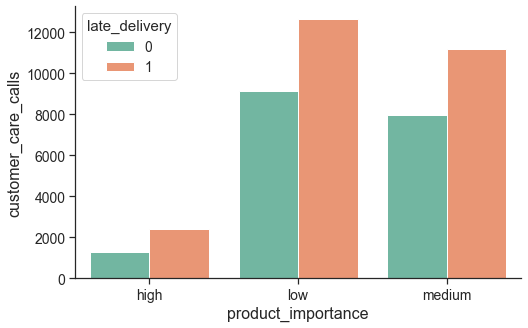

In [34]:
sns.barplot(data=dfg, y='customer_care_calls', x='product_importance', hue='late_delivery')

<AxesSubplot:xlabel='customer_care_calls', ylabel='cost_of_the_product'>

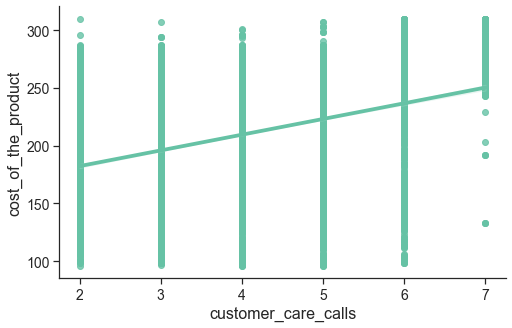

In [35]:
sns.regplot(data=df, y='cost_of_the_product', x='customer_care_calls')

Insight:
- Dari regplot di atas, terlihat bahwa yang menelpon lebih banyak adalah yang memesan barang yang lebih mahal

In [36]:
dfg = df.groupby('late_delivery').agg({'id':'nunique'})
dfg['ratio'] = round(100*dfg['id']/len(df),2)
dfg

,id,ratio
late_delivery,,
0,4436,40.33
1,6563,59.67


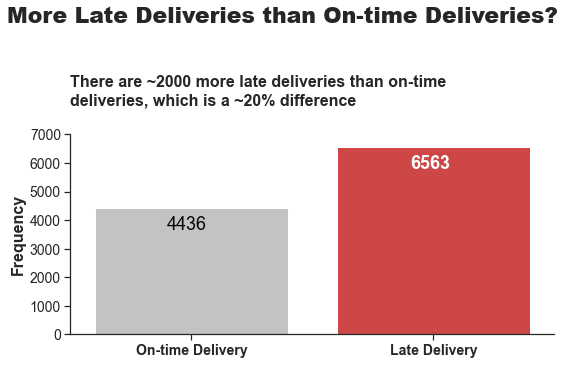

In [37]:
plt.figure()
ax = sns.countplot(data=df, x='late_delivery', palette=[gray,red])
for p in ax.patches:
  color=white if p.get_height()>5000 else black
  fontweight='semibold' if p.get_height()>=dfg['id'].max()-1 else 'normal'
  ax.annotate(str(round(p.get_height(),2)), ((-0.1+p.get_x()+p.get_width()/2)*1.005, -800+(p.get_height() * 1.005)), color=color, fontsize=18, fontweight=fontweight)

plt.suptitle('More Late Deliveries than On-time Deliveries?',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('There are ~2000 more late deliveries than on-time\ndeliveries, which is a ~20% difference',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylim((0,7000))
plt.xlabel('', fontweight='semibold')
plt.ylabel('Frequency', fontweight='semibold')
plt.xticks(rotation=0, ticks=np.arange(2), labels=['On-time Delivery', 'Late Delivery'], fontweight='semibold')
plt.tight_layout()
plt.show()

Insight:
- Dari 11000 total shipment, 60% adalah late deliveries, yakni 20% lebih banyak dari on-time deliveries.
- On time delivery rate (banyaknya on time delivery dibagi total delivery) hanya sebesar ~40% dan perlu ditingkatkan oleh bisnis ecommerce

In [38]:
dfg1 = df[df['late_delivery']==1].groupby(['customer_care_calls']).agg({'id':'nunique'}).reset_index()
dfg1['ratio'] = round(100*dfg1['id']/len(df),2)
dfg1['rel_ratio'] = round(100*dfg1['id']/dfg1['id'].sum(),2)
dfg1

,customer_care_calls,id,ratio,rel_ratio
0,2,416,3.78,6.34
1,3,2011,18.28,30.64
2,4,2126,19.33,32.39
3,5,1360,12.36,20.72
4,6,523,4.75,7.97
5,7,127,1.15,1.94


In [39]:
dfg2 = df[df['late_delivery']==0].groupby(['customer_care_calls']).agg({'id':'nunique'}).reset_index()
dfg2['ratio'] = round(100*dfg2['id']/len(df),2)
dfg2['rel_ratio'] = round(100*dfg2['id']/dfg2['id'].sum(),2)
dfg2

,customer_care_calls,id,ratio,rel_ratio
0,2,222,2.02,5.00
1,3,1206,10.96,27.19
2,4,1431,13.01,32.26
3,5,968,8.80,21.82
4,6,490,4.45,11.05
5,7,119,1.08,2.68


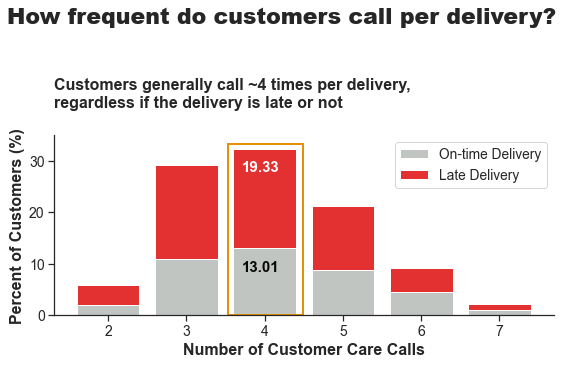

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(dfg2['customer_care_calls'], dfg2['ratio'], label='On-time Delivery', color=gray)
ax.bar(dfg1['customer_care_calls'], dfg1['ratio'], bottom=dfg2['ratio'], label='Late Delivery', color=red)

for p in ax.patches:
  color=white if p.get_y()>0 else black
  if p.get_x()== 3.6:
    ax.annotate(str(round(p.get_height(),2)), (0.095+(p.get_x() * 1.005), -4.5+(p.get_y() * 1.005)+(p.get_height())), color=color, fontweight='semibold')
  # print(p)

rect = patches.Rectangle((3.525, 0), 0.97, 33.25, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('How frequent do customers call per delivery?',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Customers generally call ~4 times per delivery,\nregardless if the delivery is late or not',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Percent of Customers (%)', fontsize=16, fontweight='semibold')
plt.xlabel('Number of Customer Care Calls', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
plt.ylim(0,35)
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- Customer umumnya melakukan customer care calls sebanyak kurang lebih 4 kali untuk setiap shipment, pada late delivery maupun on-time delivery.
- Apakah banyaknya customer care calls dipengaruhi oleh late delivery? (Dibuktikan dengan uji hipotesa)

In [41]:
dfg = df.groupby(['customer_care_calls',]).agg({'late_delivery':'sum','id':'nunique'})
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['abs_ratio'] = dfg['late_delivery']/len(df)
dfg

,late_delivery,id,rel_ratio,abs_ratio
customer_care_calls,,,,
2,416,638,0.652038,0.037822
3,2011,3217,0.625117,0.182835
4,2126,3557,0.597695,0.193290
5,1360,2328,0.584192,0.123648
6,523,1013,0.516288,0.047550
7,127,246,0.516260,0.011547


In [42]:
late_delivery = df[df['late_delivery']==1]
on_time_delivery = df[df['late_delivery']==0]

In [43]:
late_delivery['customer_care_calls'].mean()

3.9914673167758647

In [44]:
on_time_delivery['customer_care_calls'].mean()

4.147655545536519

In [45]:
tstat, p_value = st.ttest_ind(a=on_time_delivery['customer_care_calls'], b=late_delivery['customer_care_calls'])
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Fail to Reject H0')
else:
    print('Reject H0 and Accept H1')

P-Value : 1.827535178623975e-12
Reject H0 and Accept H1


Insight:
- Customer care calls dari on time delivery lebih banyak daripada late delivery, namun tidak signifikan
- Customer care calls tidak dipengaruhi oleh late delivery

<AxesSubplot:xlabel='customer_rating', ylabel='count'>

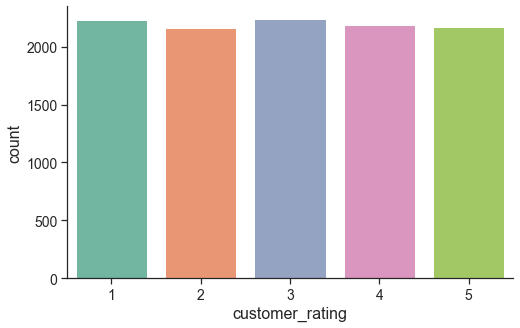

In [46]:
sns.countplot(data=df, x='customer_rating')

In [47]:
dfg = df.groupby(['customer_rating',]).agg({'late_delivery':'sum','id':'nunique'})
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['abs_ratio'] = dfg['late_delivery']/len(df)
dfg

,late_delivery,id,rel_ratio,abs_ratio
customer_rating,,,,
1,1313,2235,0.587472,0.119374
2,1273,2165,0.587991,0.115738
3,1357,2239,0.606074,0.123375
4,1303,2189,0.595249,0.118465
5,1317,2171,0.606633,0.119738


Insight:
- Nilai customer rating tidak dipengaruhi oleh late delivery (dibuktikan dengan uji hipotesa)

In [48]:
late_delivery = df[df['late_delivery']==1]
on_time_delivery = df[df['late_delivery']==0]

In [49]:
late_delivery['customer_rating'].mean()

3.005790035044949

In [50]:
on_time_delivery['customer_rating'].mean()

2.967989179440938

In [51]:
tstat, p_value = st.ttest_ind(a=on_time_delivery['customer_rating'], b=late_delivery['customer_rating'])
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Fail to Reject H0')
else:
    print('Reject H0 and Accept H1')

P-Value : 0.16890489722530824
Fail to Reject H0


Insight:
- Terbukti bahwa late delivery / on-time delivery tidak mempengaruhi customer rating
- Customer rating tidak bisa menjadi 'measure of success' dari on time delivery rate

In [52]:
df.groupby('late_delivery').agg({'customer_care_calls':'mean',
                                       'customer_rating':'mean'})

,customer_care_calls,customer_rating
late_delivery,,
0,4.147656,2.967989
1,3.991467,3.005790


In [53]:
dfg = df.groupby(['warehouse_block', 'mode_of_shipment']).agg({'late_delivery':'sum',
                                                               'id':'nunique'
                                                               }).reset_index()
dfg['ratio'] = round(100*dfg['late_delivery']/len(df),2)
dfg['rel_ratio'] = round(100*dfg['late_delivery']/dfg['id'],2)
dfg['warehouse_shipment'] = dfg['warehouse_block']+' - '+dfg['mode_of_shipment']
dfg

,warehouse_block,mode_of_shipment,late_delivery,id,ratio,rel_ratio,warehouse_shipment
0,A,Flight,174,297,1.58,58.59,A - Flight
1,A,Road,168,294,1.53,57.14,A - Road
2,A,Ship,733,1242,6.66,59.02,A - Ship
3,B,Flight,177,296,1.61,59.80,B - Flight
4,B,Road,172,294,1.56,58.50,B - Road
5,B,Ship,755,1243,6.86,60.74,B - Ship
6,C,Flight,184,295,1.67,62.37,C - Flight
7,C,Road,169,294,1.54,57.48,C - Road
8,C,Ship,741,1244,6.74,59.57,C - Ship
9,D,Flight,178,297,1.62,59.93,D - Flight


In [54]:
dfg[dfg['mode_of_shipment']=='Flight']['ratio']+dfg[dfg['mode_of_shipment']=='Road']['ratio'].values

0     3.11
3     3.17
6     3.21
9     3.20
12    6.44
Name: ratio, dtype: float64

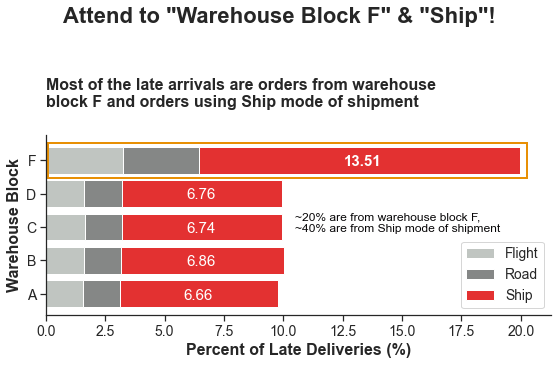

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dfg[dfg['mode_of_shipment']=='Flight']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Flight']['ratio'], label='Flight', color=gray)
ax.barh(dfg[dfg['mode_of_shipment']=='Road']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Road']['ratio'], label='Road', color=darkgray, left=dfg[dfg['mode_of_shipment']=='Flight']['ratio'])
ax.barh(dfg[dfg['mode_of_shipment']=='Ship']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Ship']['ratio'], label='Ship', color=red, left=(dfg[dfg['mode_of_shipment']=='Flight']['ratio']+dfg[dfg['mode_of_shipment']=='Road']['ratio'].values))

for p in ax.patches:
  color=white
  fontweight='semibold' if p.get_width()>=dfg['ratio'].max()-1 else 'normal'
  if p.get_width()>6:
    ax.annotate(str(round(p.get_width(),2)), (-0.7+(p.get_x()+p.get_width()/2)*1.005, 0.23+p.get_y()*1.005), color=color, fontweight=fontweight)
  # print(p)

string='~20% are from warehouse block F,\n~40% are from Ship mode of shipment'
ax.annotate(string, (-2.75+(p.get_x()+p.get_width()/2)*1.005, -1.75+p.get_y()*1.005), color=black, fontsize=12)

rect = patches.Rectangle((0.1, 3.475), 20.15, 1.05, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('Attend to "Warehouse Block F" & "Ship"!',
             fontsize=22, fontweight='bold', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Most of the late arrivals are orders from warehouse\nblock F and orders using Ship mode of shipment',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Warehouse Block', fontsize=16, fontweight='semibold')
plt.xlabel('Percent of Late Deliveries (%)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- 20% dari late deliveries merupakan shipment dari warehouse block F.
- Bisakah shipment didistribusi untuk warehouse block lainnya secara evenly? (clearly there is an issue with product shipment distribution among the warehouse blocks)
- Perlu ditambah pekerja/couriers untuk warehouse block F? (allocating more workers in warehouse block F can maybe help the delay)
- 40% dari late deliveries merupakan shipment yang menggunakan Ship/kapal.
- Can we advise customers that ship method generally takes longer time to deliver and prolong expected arrival date? (see issues with cargo ships)

Links:
- http://www.pacificmarine.net/marine-deck/cargo-securing/how-do-container-ships-work.htm
- https://www.searates.com/blog/post/25-most-common-reasons-of-cargo-delays

<BarContainer object of 15 artists>

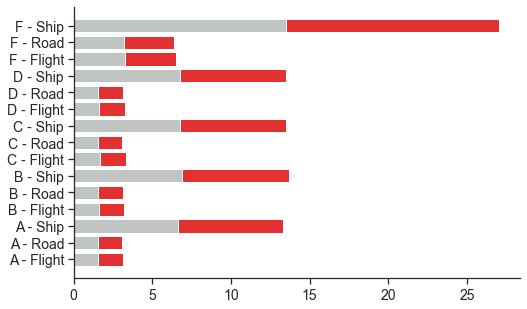

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dfg['warehouse_shipment'], dfg['ratio'], label='On-time Delivery', color=gray)
ax.barh(dfg['warehouse_shipment'], dfg['ratio'], left=dfg['ratio'], label='Late Deliveries', color=red)

In [57]:
df.groupby('warehouse_block').agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                           mean median                mean median             mean median          mean  median            mean median                mean median
warehouse_block                                                                                                                                                  
A                      3.577741    3.0          208.767594  212.0        13.222586    7.0   3615.448991  4127.0        2.957447    3.0            4.038189    4.0
B                      3.575014    3.0          212.159302  219.0        13.187125    7.0   3635.701037  4149.0        2.980360    3.0            4.020185    4.0
C                      3.554828    3.0          211.191489  214.0        13.399891    7.0   3641.331151  4182.0        2.993999    3.0            4.064921    4.0
D                      3.601963    3.0          210.907852  216.0        13.093784    7.0   3628.846783  4134.5        3.017993    3.0            4.053435    4.0
F                      3.548009    3.0          209.077196  213.0        13.668031    7.0   3641.387616  4153.5        2.996727    3.0            4.075014    4.0

In [58]:
dfg = df.groupby(['mode_of_shipment']).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                            mean median                mean median             mean median          mean  median            mean median                mean median
mode_of_shipment                                                                                                                                                  
Flight                  3.566685    3.0          209.306697  214.0        13.160945    7.0   3629.378165  4152.0        2.982555    3.0            4.104108    4.0
Road                    3.581250    3.0          210.475568  216.0        13.084091    7.0   3649.550568  4194.5        2.995455    3.0            4.063068    4.0
Ship                    3.564594    3.0          210.343072  214.0        13.491959    7.0   3631.457518  4141.5        2.991289    3.0            4.040606    4.0

In [59]:
dfg = df.groupby('product_importance').agg({'late_delivery':'sum',
                                            'id':'nunique'}).reset_index()
dfg['ontime'] = dfg['id']-dfg['late_delivery']
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['late_ratio'] = round(100*dfg['late_delivery']/len(df),2)
dfg['ontime_ratio'] = round(100*dfg['ontime']/len(df),2)
dfg = dfg.sort_values('late_ratio', ascending=False)
dfg['product_importance'] = dfg['product_importance'].apply(lambda x: x.capitalize())
dfg

,product_importance,late_delivery,id,ontime,rel_ratio,late_ratio,ontime_ratio
1,Low,3140,5297,2157,0.592788,28.55,19.61
2,Medium,2807,4754,1947,0.590450,25.52,17.70
0,High,616,948,332,0.649789,5.60,3.02


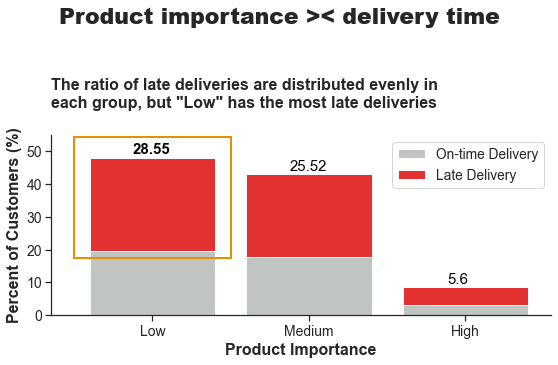

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(dfg['product_importance'], dfg['ontime_ratio'], label='On-time Delivery', color=gray)
ax.bar(dfg['product_importance'], dfg['late_ratio'], label='Late Delivery', color=red, bottom=dfg['ontime_ratio'])

for p in ax.patches:
  color=black
  fontweight='semibold' if p.get_height()>=dfg['late_ratio'].max()-1 else 'normal'
  if p.get_y()>0:
    ax.annotate(str(round(p.get_height(),2)), (0.275+(p.get_x()*1.005), 1+(p.get_y()*1.005)+(p.get_height())), color=color, fontweight=fontweight)
  # print(p)

rect = patches.Rectangle((-0.5, 17.5), 1, 37, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('Product importance >< delivery time',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('The ratio of late deliveries are distributed evenly in\neach group, but "Low" has the most late deliveries',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Percent of Customers (%)', fontsize=16, fontweight='semibold')
plt.xlabel('Product Importance', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
plt.ylim(0,55)
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- 28.55% dari late deliveries adalah yang low importance.
- Secara relatif, setiap importance group memiliki rasio late deliveries yang serupa

In [61]:
dfg = df.groupby(['product_importance'], sort=False).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                              mean median                mean median             mean median          mean  median            mean median                mean median
product_importance                                                                                                                                                  
low                       3.528224    3.0          212.059845  218.0        13.043043    7.0   3497.488956  4032.0        2.983576    3.0            4.110251    4.0
medium                    3.593605    3.0          209.382415  213.0        13.483172    7.0   3712.050484  4203.0        2.997686    3.0            4.028607    4.0
high                      3.657173    3.0          203.871308  205.5        14.666667    7.0   4005.551688  4408.0        2.993671    3.0            3.872363    4.0

In [62]:
dfg = df.groupby(['late_delivery','product_importance']).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],}).sort_values(('prior_purchases','mean'))
dfg

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                                            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery product_importance                                                                                                                                                  
1             low                       3.451592    3.0          208.831529  212.0        18.143312    9.0   3150.732484  2935.0        2.978025    3.0            4.026752    4.0
              medium                    3.533666    3.0          206.746705  208.0        19.004275    9.0   3340.801568  3382.0        3.039188    3.0            3.979694    4.0
              high                      3.573052    3.0          201.899351  202.0        19.764610    9.0   3583.452922  3798.0        2.995130    3.0            3.865260    4.0
0             low                       3.639777    3.0          216.759388  224.0         5.618452    6.0   4002.271210  4625.0        2.991655    3.0            4.231803    4.0
              medium                    3.680021    3.0          213.182332  220.0         5.523369    6.0   4247.281972  4677.0        2.937853    3.0            4.099127    4.0
              high                      3.813253    3.0          207.530120  211.0         5.207831    5.0   4788.722892  4923.5        2.990964    3.0            3.885542    4.0

Insight:
- the higher the product importance, generally the heavier
- for late deliveries, more discounts are offered the higher the importance of the product
- the higher the importance of product, the lower the cost of product
- most likely cost of product takes into account of the discount offered

In [63]:
dfg = df.groupby(['late_delivery']).agg({'prior_purchases':'mean',
                                                                 'cost_of_the_product':'mean',
                                                                 'discount_offered':'mean',
                                                                 'weight_in_gms':'mean',
                                                                 'customer_care_calls':'mean',
                                                                 'customer_rating':'mean'})
dfg

,prior_purchases,cost_of_the_product,discount_offered,weight_in_gms,customer_care_calls,customer_rating
late_delivery,,,,,,
0,3.670424,214.498647,5.545987,4168.668395,4.147656,2.967989
1,3.498095,207.289197,18.663721,3272.640104,3.991467,3.005790


<AxesSubplot:xlabel='late_delivery', ylabel='weight_in_gms'>

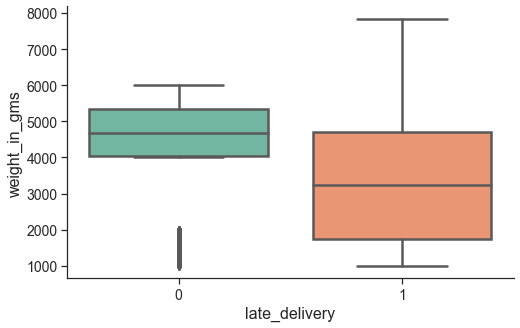

In [64]:
sns.boxplot(data=df, y='weight_in_gms', x='late_delivery')

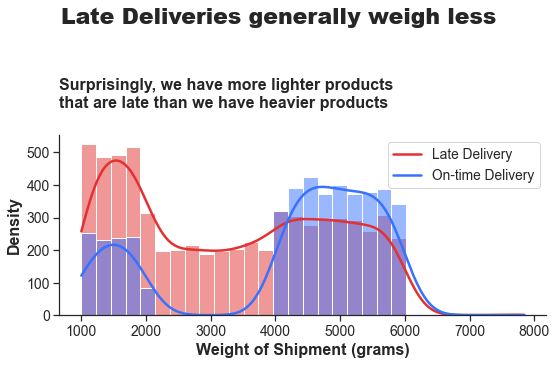

In [65]:
plt.figure(figsize=(8,5))
# ax = sns.kdeplot(data=df, x='weight_in_gms', hue='late_delivery', palette=[blue,red], fill=True, alpha=0.6, legend=False)
ax = sns.histplot(data=df, x='weight_in_gms', hue='late_delivery', palette=[blue,red], alpha=0.5, legend=False, bins=30, kde=True)

# rect = patches.Rectangle((800, 0.000088), 1600, 0.00011, linewidth=2, edgecolor=black, facecolor='none')
# ax.add_patch(rect)

plt.suptitle('Late Deliveries generally weigh less',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Surprisingly, we have more lighter products\nthat are late than we have heavier products',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Density', fontsize=16, fontweight='semibold')
plt.xlabel('Weight of Shipment (grams)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
# plt.ylim(0,0.00020)

plt.legend(title='', loc='upper right', labels=['Late Delivery', 'On-time Delivery'])
plt.tight_layout()
plt.show()

Insight:
- lighter products are more likely to be a late delivery

<AxesSubplot:xlabel='weight_in_gms', ylabel='Density'>

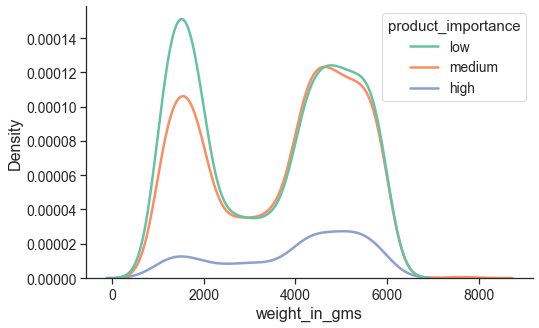

In [66]:
sns.kdeplot(data=df, x='weight_in_gms', hue='product_importance')

<AxesSubplot:xlabel='weight_in_gms', ylabel='Density'>

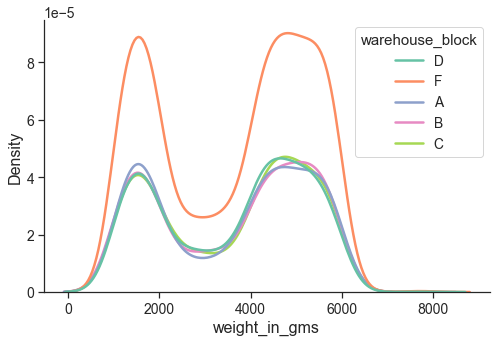

In [67]:
sns.kdeplot(data=df, x='weight_in_gms', hue='warehouse_block')

<AxesSubplot:xlabel='weight_in_gms', ylabel='Density'>

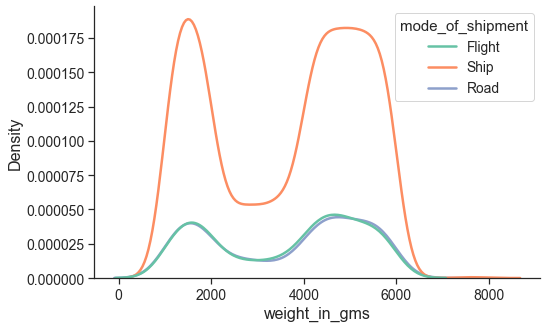

In [68]:
sns.kdeplot(data=df, x='weight_in_gms', hue='mode_of_shipment')

<AxesSubplot:xlabel='weight_in_gms', ylabel='cost_of_the_product'>

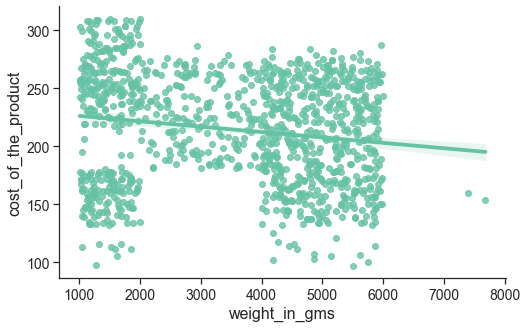

In [69]:
sns.regplot(data=df.sample(frac=0.1, random_state=13), x='weight_in_gms', y='cost_of_the_product')

In [70]:
df

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,late_delivery
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [71]:
high_calls = df[df['customer_care_calls']>4]
low_calls = df[df['customer_care_calls']<=4]

In [72]:
high_calls[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,3587.0,5.419571,0.617089,5.0,5.0,5.0,6.0,7.0
customer_rating,3587.0,3.005854,1.426277,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,3587.0,227.729300,49.672727,96.0,191.0,240.0,265.0,310.0
prior_purchases,3587.0,3.952607,1.338222,2.0,3.0,4.0,5.0,10.0
discount_offered,3587.0,11.121550,14.228466,1.0,4.0,7.0,10.0,65.0
weight_in_gms,3587.0,3049.156677,1689.841824,1001.0,1515.5,2201.0,4712.5,6000.0
late_delivery,3587.0,0.560357,0.496413,0.0,0.0,1.0,1.0,1.0


In [73]:
low_calls[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,7412.0,3.393821,0.641042,2.0,3.00,3.0,4.00,4.0
customer_rating,7412.0,2.983135,1.407466,1.0,2.00,3.0,4.00,5.0
cost_of_the_product,7412.0,201.712089,44.871997,96.0,163.75,202.0,241.00,310.0
prior_purchases,7412.0,3.381274,1.571166,2.0,2.00,3.0,4.00,10.0
discount_offered,7412.0,14.462898,16.974326,1.0,4.00,7.0,15.25,65.0
weight_in_gms,7412.0,3917.056800,1530.197027,1001.0,2522.00,4357.0,5171.00,7846.0
late_delivery,7412.0,0.614274,0.486799,0.0,0.00,1.0,1.00,1.0


Insight:
- high calls have generally higher product cost, higher prior purchases
- high calls have generally less discount offered, less weight in grams
- low calls have more late deliveries compared to high calls

In [74]:
high_calls[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,3587,5,F,1222
mode_of_shipment,3587,3,Ship,2395
product_importance,3587,3,low,1828
gender,3587,2,F,1808


In [75]:
low_calls[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,7412,5,F,2444
mode_of_shipment,7412,3,Ship,5067
product_importance,7412,3,low,3469
gender,7412,2,F,3737


In [76]:
dfg1 = high_calls.groupby('late_delivery').agg({'id':'nunique'})
dfg1['rel_ratio'] = dfg1['id']/dfg1['id'].sum()
dfg1

,id,rel_ratio
late_delivery,,
0,1577,0.439643
1,2010,0.560357


In [77]:
dfg2 = low_calls.groupby('late_delivery').agg({'id':'nunique'})
dfg2['rel_ratio'] = dfg2['id']/dfg2['id'].sum()
dfg2

,id,rel_ratio
late_delivery,,
0,2859,0.385726
1,4553,0.614274


In [78]:
high_rating = df[df['customer_rating']>=4]
low_rating = df[df['customer_rating']<4]

In [79]:
high_rating[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,4360.0,4.064679,1.147702,2.0,3.00,4.0,5.0,7.0
customer_rating,4360.0,4.497936,0.500053,4.0,4.00,4.0,5.0,5.0
cost_of_the_product,4360.0,210.646789,48.387890,97.0,170.00,216.0,252.0,310.0
prior_purchases,4360.0,3.586697,1.561556,2.0,3.00,3.0,4.0,10.0
discount_offered,4360.0,13.375459,16.110868,1.0,4.00,7.0,10.0,65.0
weight_in_gms,4360.0,3644.204128,1625.654162,1001.0,1850.75,4157.0,5042.0,7684.0
late_delivery,4360.0,0.600917,0.489766,0.0,0.00,1.0,1.0,1.0


In [80]:
low_rating[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,6639.0,4.047748,1.137428,2.0,3.0,4.0,5.0,7.0
customer_rating,6639.0,2.000603,0.820974,1.0,1.0,2.0,3.0,3.0
cost_of_the_product,6639.0,209.901341,47.850240,96.0,169.0,214.0,250.0,310.0
prior_purchases,6639.0,3.555053,1.496890,2.0,3.0,3.0,4.0,10.0
discount_offered,6639.0,13.371743,16.268603,1.0,4.0,7.0,10.0,65.0
weight_in_gms,6639.0,3627.326405,1641.819135,1001.0,1836.0,4145.0,5054.5,7846.0
late_delivery,6639.0,0.593915,0.491138,0.0,0.0,1.0,1.0,1.0


In [81]:
high_rating[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,4360,5,F,1463
mode_of_shipment,4360,3,Ship,2935
product_importance,4360,3,low,2111
gender,4360,2,F,2191


In [82]:
low_rating[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,6639,5,F,2203
mode_of_shipment,6639,3,Ship,4527
product_importance,6639,3,low,3186
gender,6639,2,F,3354


In [83]:
df[df['customer_rating']==1].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,2235.000000,2235.000000,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,5572.305145,4.036242,1.0,208.979866,3.529306,13.458166,3654.797315,0.587472
std,3194.633190,1.142502,0.0,48.090681,1.494968,16.330281,1635.767150,0.492399
min,6.000000,2.000000,1.0,96.000000,2.000000,1.000000,1003.000000,0.000000
25%,2761.000000,3.000000,1.0,169.000000,2.000000,4.000000,1841.500000,0.000000
50%,5659.000000,4.000000,1.0,213.000000,3.000000,7.000000,4166.000000,1.000000
75%,8372.000000,5.000000,1.0,250.000000,4.000000,10.000000,5074.000000,1.000000
max,10996.000000,7.000000,1.0,310.000000,10.000000,65.000000,6064.000000,1.000000


In [84]:
df[df['customer_rating']==5].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,2171.000000,2171.000000,2171.0,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000
mean,5489.732842,4.090742,5.0,211.164901,3.585905,13.494703,3586.005067,0.606633
std,3165.658259,1.172481,0.0,49.190933,1.549896,16.256593,1634.936757,0.488610
min,2.000000,2.000000,5.0,98.000000,2.000000,1.000000,1001.000000,0.000000
25%,2699.500000,3.000000,5.0,168.000000,3.000000,4.000000,1799.500000,0.000000
50%,5516.000000,4.000000,5.0,218.000000,3.000000,7.000000,4096.000000,1.000000
75%,8283.000000,5.000000,5.0,253.000000,4.000000,10.000000,5010.500000,1.000000
max,10999.000000,7.000000,5.0,310.000000,10.000000,65.000000,7401.000000,1.000000


In [85]:
df.groupby('customer_care_calls').agg({'id':['mean','median'],
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})

id         prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                            mean  median            mean median                mean median             mean median          mean  median            mean median                mean median
customer_care_calls                                                                                                                                                                       
2                    4419.606583  3871.0        3.432602    3.0          189.888715  182.0        16.774295    8.0   3682.147335  4164.0        3.017241    3.0                 2.0    2.0
3                    4971.798570  4523.0        3.261424    3.0          198.876904  198.0        15.289711    8.0   4029.557973  4411.0        2.959901    3.0                 3.0    3.0
4                    5476.010964  5416.0        3.480461    3.0          206.396964  209.0        13.300534    7.0   3857.443632  4343.0        2.998032    3.0                 4.0    4.0
5                    5917.528780  6174.5        3.825601    3.0          214.328608  225.0        12.618127    7.0   3470.551546  3970.0        2.972938    3.0                 5.0    5.0
6                    6508.210267  6589.0        4.202369    4.0          246.478776  260.0         8.813425    6.0   2461.900296  1716.0        3.083909    3.0                 6.0    6.0
7                    7453.333333  7725.0        4.126016    4.0          277.337398  282.0         6.463415    6.0   1479.577236  1478.5        2.995935    3.0                 7.0    7.0

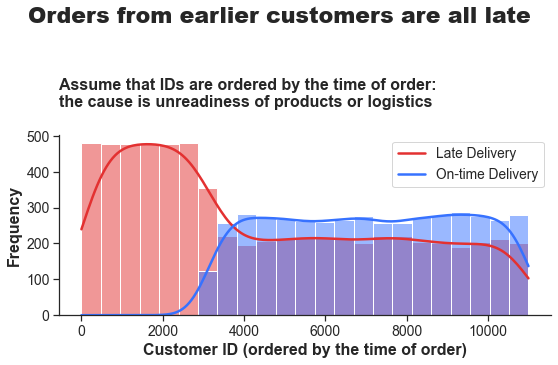

In [86]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x='id', hue='late_delivery', alpha=0.5, kde=True, legend=False, palette=[blue,red])

plt.suptitle('Orders from earlier customers are all late',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Assume that IDs are ordered by the time of order:\nthe cause is unreadiness of products or logistics',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Frequency', fontsize=16, fontweight='semibold')
plt.xlabel('Customer ID (ordered by the time of order)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
# plt.ylim(0,0.00020)

plt.legend(title='', loc='upper right', labels=['Late Delivery', 'On-time Delivery'])
plt.tight_layout()
plt.show()

Insights:
- lower IDs were all late --> let's assume these IDs are in chronological order of the order time
- could this be because the shipment wasn't ready for these new orders?

In [87]:
low_id = df[df['id']<4000]
high_id = df[df['id']>=4000]

In [88]:
high_id[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,7000.0,4.228143,1.183702,2.0,3.0,4.0,5.0,7.0
customer_rating,7000.0,2.998429,1.415778,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,7000.0,217.693429,47.822339,96.0,178.0,226.0,256.0,310.0
prior_purchases,7000.0,3.713571,1.494989,2.0,3.0,3.0,4.0,10.0
discount_offered,7000.0,5.536000,2.883729,1.0,3.0,6.0,8.0,10.0
weight_in_gms,7000.0,4048.487143,1629.745069,1001.0,1924.0,4618.5,5297.0,6000.0
late_delivery,7000.0,0.435429,0.495848,0.0,0.0,0.0,1.0,1.0


In [89]:
low_id[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,3999.0,3.750438,0.993090,2.0,3.0,4.0,4.0,7.0
customer_rating,3999.0,2.976744,1.409859,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,3999.0,197.074519,45.612095,96.0,159.0,194.0,236.0,301.0
prior_purchases,3999.0,3.312078,1.537633,2.0,2.0,3.0,4.0,10.0
discount_offered,3999.0,27.091773,20.299911,1.0,8.0,23.0,45.0,65.0
weight_in_gms,3999.0,2908.512128,1371.151816,1001.0,1715.0,2715.0,3818.0,7846.0
late_delivery,3999.0,0.878970,0.326203,0.0,1.0,1.0,1.0,1.0


In [90]:
high_id[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,7000,5,F,2333
mode_of_shipment,7000,3,Ship,4756
product_importance,7000,3,low,3445
gender,7000,2,F,3557


In [91]:
low_id[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,3999,5,F,1333
mode_of_shipment,3999,3,Ship,2706
product_importance,3999,3,low,1852
gender,3999,2,M,2011


In [92]:
late = df[df['late_delivery']==1]
late.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.0
mean,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104,1.0
std,3243.986559,1.122592,1.412692,48.054876,1.517285,19.108797,1576.148391,0.0
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,1641.500000,3.000000,2.000000,167.000000,3.000000,5.000000,1735.500000,1.0
50%,3467.000000,4.000000,3.000000,209.000000,3.000000,9.000000,3231.000000,1.0
75%,7194.500000,5.000000,4.000000,249.000000,4.000000,32.000000,4696.500000,1.0
max,10995.000000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.0


In [93]:
ontime = df[df['late_delivery']==0]
ontime.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.0
mean,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395,0.0
std,2278.543555,1.162771,1.414808,47.757432,1.525444,2.877727,1573.954178,0.0
min,3136.000000,2.000000,1.000000,97.000000,2.000000,1.000000,1001.000000,0.0
25%,5092.250000,3.000000,2.000000,174.000000,3.000000,3.000000,4043.500000,0.0
50%,7096.000000,4.000000,3.000000,222.000000,3.000000,6.000000,4674.000000,0.0
75%,9078.500000,5.000000,4.000000,254.000000,4.000000,8.000000,5337.000000,0.0
max,10999.000000,7.000000,5.000000,310.000000,10.000000,10.000000,6000.000000,0.0


In [94]:
early_id = df[df['id']<3000]
early_id.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.0
mean,1500.000000,3.741914,2.969990,195.848950,3.307436,33.163054,2361.877626,1.0
std,865.881054,0.994689,1.414367,45.691911,1.524379,18.915451,921.524629,0.0
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,750.500000,3.000000,2.000000,158.000000,2.000000,17.000000,1563.500000,1.0
50%,1500.000000,4.000000,3.000000,192.000000,3.000000,34.000000,2229.000000,1.0
75%,2249.500000,4.000000,4.000000,234.000000,4.000000,49.000000,3129.500000,1.0
max,2999.000000,7.000000,5.000000,296.000000,10.000000,65.000000,7846.000000,1.0


In [95]:
high_id = df[df['id']>=3000]
high_id.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6999.50000,4.171625,2.998250,215.575500,3.665125,5.954500,4110.909875,0.445500
std,2309.54541,1.170616,1.413328,47.828639,1.510884,5.010271,1588.925959,0.497052
min,3000.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,4999.75000,3.000000,2.000000,176.000000,3.000000,3.000000,3114.750000,0.000000
50%,6999.50000,4.000000,3.000000,223.000000,3.000000,6.000000,4636.000000,0.000000
75%,8999.25000,5.000000,4.000000,255.000000,4.000000,8.000000,5310.250000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,64.000000,6000.000000,1.000000


In [96]:
early_id[cats].describe()

,warehouse_block,mode_of_shipment,product_importance,gender
count,2999,2999,2999,2999
unique,5,3,3,2
top,F,Ship,low,F
freq,999,2046,1391,1525


In [97]:
high_id[cats].describe()

,warehouse_block,mode_of_shipment,product_importance,gender
count,8000,8000,8000,8000
unique,5,3,3,2
top,F,Ship,low,F
freq,2667,5416,3906,4020


<AxesSubplot:xlabel='id', ylabel='Density'>

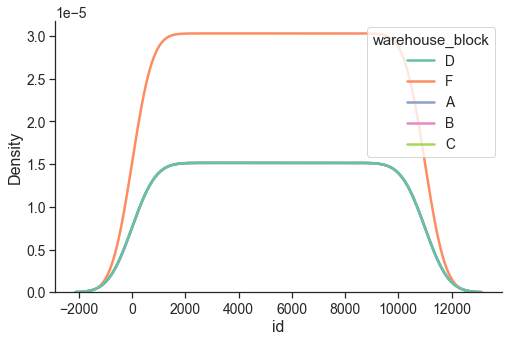

In [98]:
sns.kdeplot(data=df, x='id', hue='warehouse_block')

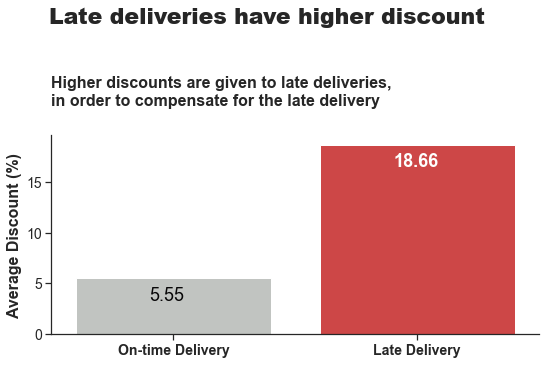

In [99]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='late_delivery', y='discount_offered', palette=[gray,red], ci=None)
for p in ax.patches:
  color=white if p.get_height()>15 else black
  fontweight='semibold' if p.get_height()>=15 else 'normal'
  ax.annotate(str(round(p.get_height(),2)), ((-0.1+p.get_x()+p.get_width()/2)*1.005, -2.25+(p.get_height() * 1.005)), color=color, fontsize=18, fontweight=fontweight)
  # print(p)

plt.suptitle('Late deliveries have higher discount',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Higher discounts are given to late deliveries,\nin order to compensate for the late delivery',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Average Discount (%)', fontsize=16, fontweight='semibold')
plt.xlabel('', fontsize=16, fontweight='semibold')
plt.xticks(rotation=0, ticks=np.arange(2), labels=['On-time Delivery','Late Delivery'], fontweight='semibold') # labels

plt.tight_layout()
plt.show()

In [100]:
sorted(df['prior_purchases'].unique())

[2, 3, 4, 5, 6, 7, 8, 10]

In [101]:
df['prior_purchases'].value_counts(ascending=False, dropna=False)

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: prior_purchases, dtype: int64

In [102]:
df[df['prior_purchases']>=6].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,5823.365902,4.075773,3.030907,210.931206,7.100698,12.677966,3617.759721,0.589232
std,3153.688303,1.039270,1.390028,47.147476,1.508734,15.752926,1631.340147,0.492219
min,38.000000,2.000000,1.000000,97.000000,6.000000,1.000000,1003.000000,0.000000
25%,3100.000000,3.000000,2.000000,174.000000,6.000000,4.000000,1850.500000,0.000000
50%,6071.000000,4.000000,3.000000,220.000000,6.000000,7.000000,4165.000000,1.000000
75%,8520.500000,5.000000,4.000000,250.000000,8.000000,10.000000,5002.500000,1.000000
max,10998.000000,6.000000,5.000000,293.000000,10.000000,65.000000,5995.000000,1.000000


In [103]:
df[df['prior_purchases']<6].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5467.553421,4.052321,2.986495,210.123149,3.213085,13.442977,3635.647959,0.597439
std,3175.780254,1.151272,1.415952,48.155901,0.972258,16.249371,1635.854290,0.490438
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2720.750000,3.000000,2.000000,169.000000,2.000000,4.000000,1837.750000,0.000000
50%,5445.500000,4.000000,3.000000,213.000000,3.000000,7.000000,4147.500000,1.000000
75%,8224.250000,5.000000,4.000000,251.000000,4.000000,10.000000,5054.000000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,5.000000,65.000000,7846.000000,1.000000


# Data Preprocessing

In [104]:
df = df.drop(columns='id', axis=1)
df.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,late_delivery
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Handling outlier data

In [105]:
nums = [col for col in nums if col not in ['late_delivery','id']]

In [106]:
# lakukan pembuangan outlier menggunakan metode yang dipilih
print(f'Rows before filtering outliers: {len(df)}')
filtered_entries = np.array([True] * len(df[nums]))
for col in df[nums].columns:
    zscore = abs(st.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries # keeping absolute z score under 
filtered_df = df[filtered_entries].copy() # filter z score under 3
print(f'Rows after filtering outliers: {len(filtered_df)}')

Rows before filtering outliers: 10999
Rows after filtering outliers: 10642


customer_care_calls


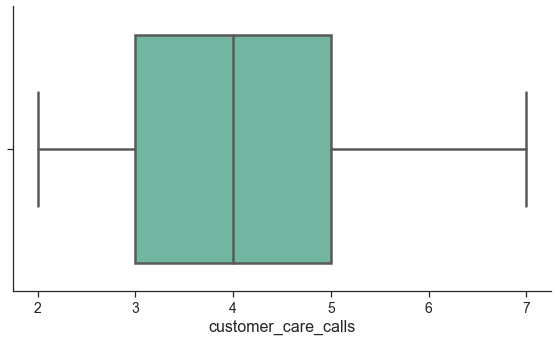

customer_rating


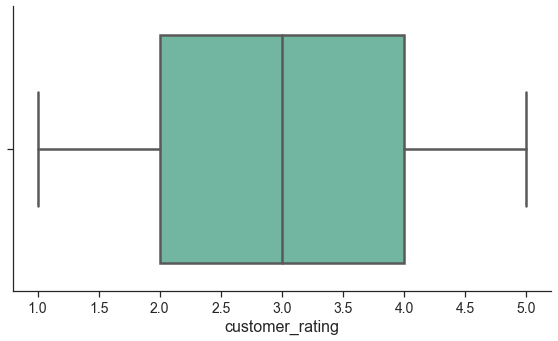

cost_of_the_product


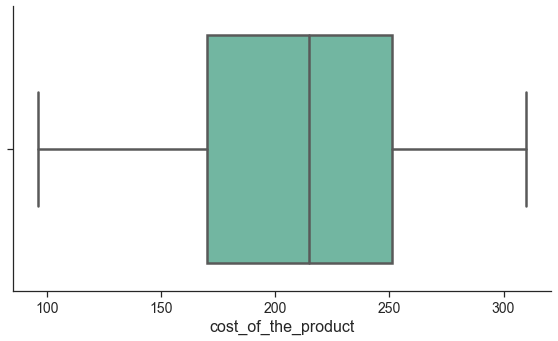

prior_purchases


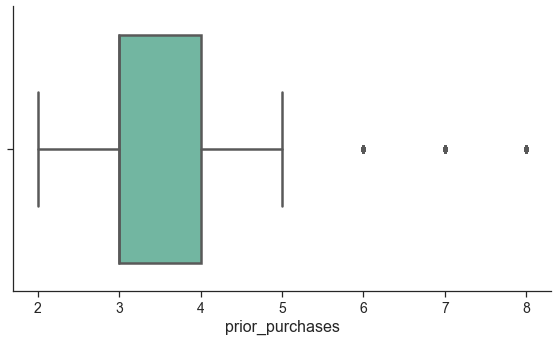

discount_offered


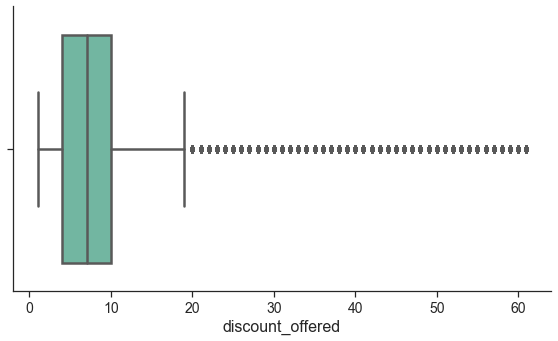

weight_in_gms


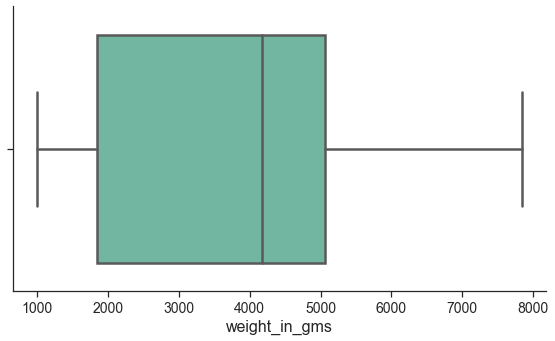

In [107]:
# plot boxplot hasil membuang outlier
for col in nums:
  print(col)
  sns.boxplot(data=filtered_df, x=col)
  plt.tight_layout()
  plt.show()

## Handling imbalance data

In [108]:
print('Before Sampling')
print(pd.Series(filtered_df['late_delivery']).value_counts())

Before Sampling
1    6282
0    4360
Name: late_delivery, dtype: int64


In [109]:
i_cats = [i for i,col in enumerate(filtered_df.columns) if col in cats]

In [110]:
from imblearn import over_sampling, under_sampling
X_sampled, y_sampled = over_sampling.SMOTENC(categorical_features=i_cats, sampling_strategy=0.75, random_state=42).fit_resample(
    filtered_df[[col for col in filtered_df if col not in ['late_delivery']]], filtered_df['late_delivery'])
# X_sampled, y_sampled = under_sampling.RandomUnderSampler(sampling_strategy='auto', random_state=42).fit_resample(
#     filtered_df[[col for col in filtered_df if col not in ['late_delivery']]], filtered_df['late_delivery'])
# X_sampled, y_sampled = filtered_df[[col for col in filtered_df if col not in ['late_delivery']]], filtered_df['late_delivery']

In [111]:
print('After Sampling')
print(pd.Series(y_sampled).value_counts())

After Sampling
1    6282
0    4711
Name: late_delivery, dtype: int64


## Splitting Data

Agar tidak terjadi data leak, ada perlunya data dibagi menjadi train set dan test set terlebih dahulu.

In [112]:
# selected_features = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'id', 'discount_offered', 'weight_in_gms']
# X = df[selected_features]
X, y = X_sampled, y_sampled
X.shape, y.shape

((10993, 10), (10993,))

In [113]:
from sklearn.model_selection import train_test_split
random_state = 42
stratify = y
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=random_state, stratify=stratify)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((2199, 10), (8794, 10), (2199,), (8794,))

## Hasil EDA

Dari EDA yang dilakukan, dapat disimpulkan bahwa terdapat beberapa tahap data preprocessing yang harus dilakukan untuk membantu proses machine learning modelling nantinya. Kesimpulan dari EDA beserta treatmentnya adalah sebagai berikut:

- Missing values --> tidak ada
- Duplicated data --> tidak ada
- Outlier data --> ada
  - Z-score
  - 1.5 * IQR
  - 3 * IQR
  - Tidak membuang outlier
- Imbalance target data --> 40 non late delivery:60 late delivery
  - SMOTE
  - Tidak melakukan class balancing
- Redundant data --> tidak ada
- Transforming distributions
  - Right / Left skew
    - Moderate skew : np.sqrt(x) / np.sqrt((df.col.max()+1) - x)
    - Medium skew: np.log(x) / np.log((df.col.max()+1) - x)
    - Severe skew: 1/x / 1/((df.col.max()+1)-x)
  - Bimodal
    - abs(x) - df.col.mean()
    
  - **Try BoxCox Transformation**
- Encoding
  - One hot encoding / pd.get_dummies untuk warehouse_block, mode_of_shipment, product_importance
  - Label encoding untuk gender
- Scaling / Normalizing
  - [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) - belum terdistribusi normal
  - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - sudah terdistribusi normal
  - [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)



Note: transformasi yang dilakukan pada train set harus dilakukan pada test set juga
- outlier harus dibuang sebelum split data
- test set tidak perlu class balancing (training saja di class balancing)
- test set harus melalui transformasi distribusi menggunakan metode yang sama
- test set harus di-scale/normalize menggunakan INSTANTIATED OBJECT yang sebelumnya sudah di-fit pada train set (transform test set menggunakan scaler yang sama tanpa harus fit lagi)

## Handling other data issues

### Transforming Distributions

In [114]:
# Transformasi sesuai hasil EDA

In [115]:
X_train['trf_weight_in_gms'] = X_train['weight_in_gms'].apply(lambda x: np.sqrt(x))

In [116]:
X_train['trf_prior_purchases'] = X_train['prior_purchases'].apply(lambda x: np.sqrt(x))

In [117]:
X_train['trf_discount_offered'] = X_train['discount_offered'].apply(lambda x: np.sqrt(x))

In [118]:
X_train['trf_cost_of_the_product'] = X_train['cost_of_the_product'].apply(lambda x: np.sqrt(x))

### Scaling / Normalizing

In [119]:
# lakukan scaling/normalizing menggunakan metode yang dipilih
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

In [120]:
nums1 = [col for col in X_train.columns if X_train[col].dtype != 'object']
scaler.fit(X_train[nums1])
X_train_scaled = scaler.transform(X_train[nums1])
X_train[nums1] = X_train_scaled
X_train.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product
734,D,Ship,0.4,1.00,0.728972,0.166667,low,M,0.250000,0.194449,0.292457,0.224745,0.440512,0.778161
3865,C,Flight,0.4,0.50,0.714953,0.166667,low,M,0.066667,0.586706,0.688318,0.224745,0.181501,0.766024
764,A,Road,0.4,1.00,0.443925,0.166667,low,F,0.300000,0.203214,0.303298,0.224745,0.493212,0.515097
3525,A,Ship,0.2,1.00,0.285047,0.166667,low,M,0.100000,0.598831,0.698566,0.224745,0.241658,0.349860
1019,D,Flight,0.4,0.75,0.485981,0.166667,low,M,0.300000,0.288532,0.402433,0.224745,0.493212,0.556314


customer_care_calls


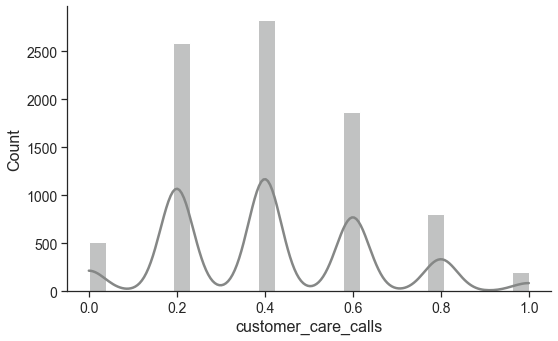

customer_rating


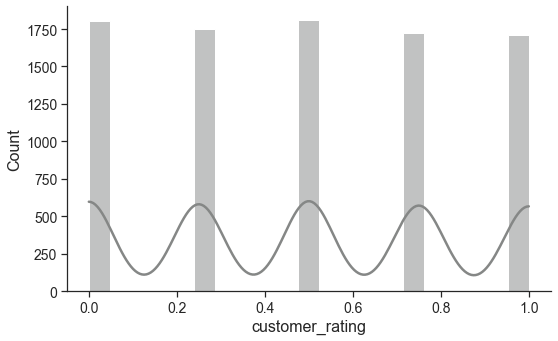

cost_of_the_product


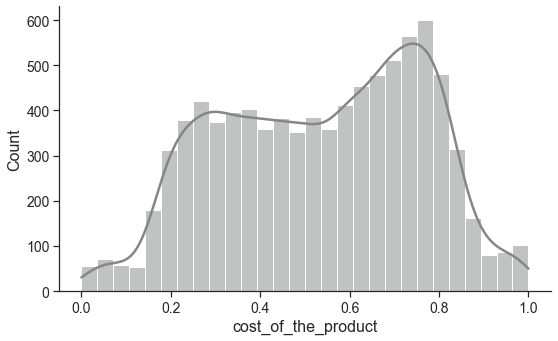

prior_purchases


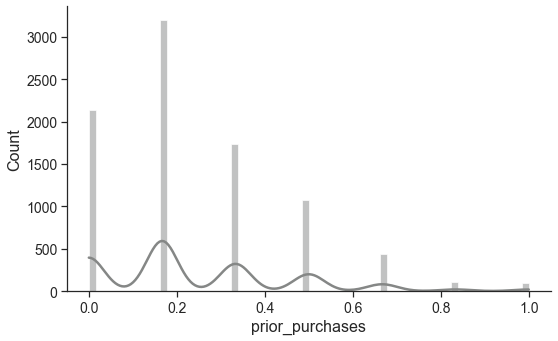

discount_offered


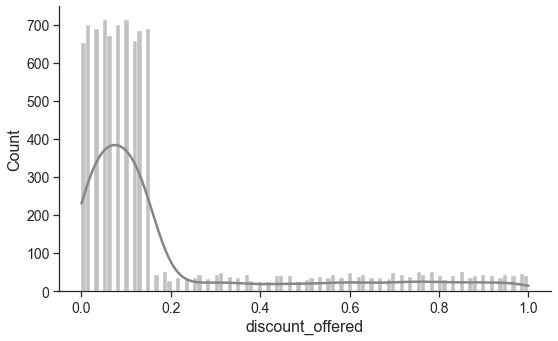

weight_in_gms


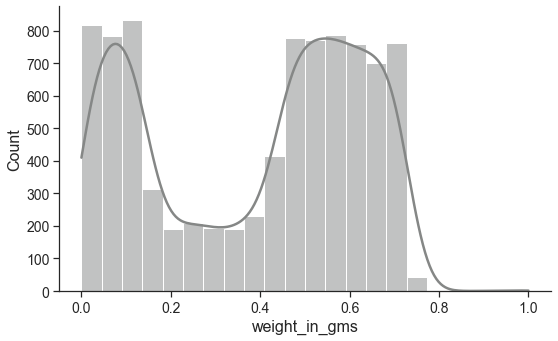

trf_weight_in_gms


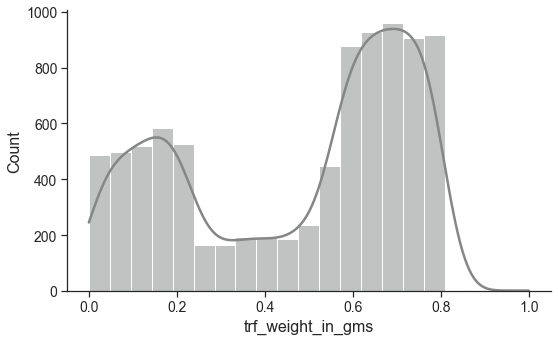

trf_prior_purchases


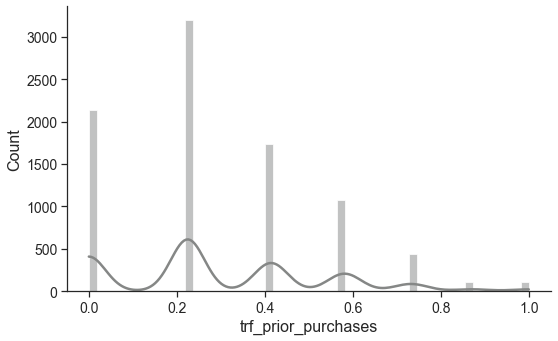

trf_discount_offered


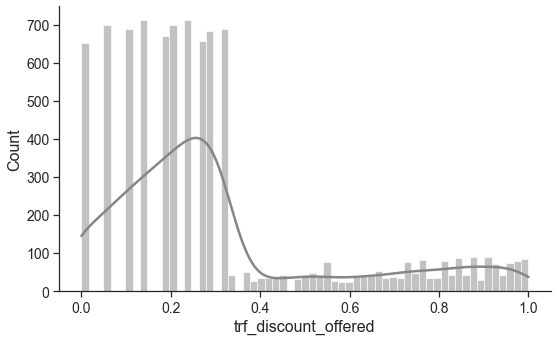

trf_cost_of_the_product


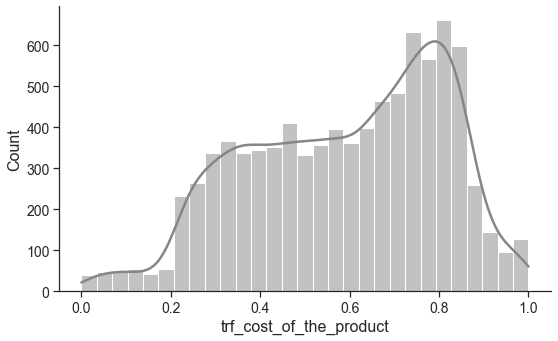

In [121]:
# plot histogram (univariate) hasil transformasi

for col in X_train.columns:
  if X_train[col].dtype != 'object':
    print(col)
    sns.histplot(data=X_train, x=col, kde=True, color=darkgray)
    plt.tight_layout()
    plt.show()

### Encoding

In [122]:
# label encoding

In [123]:
from sklearn.preprocessing import LabelEncoder
labels = ['gender']
encoders = []
for i,label in enumerate(labels):
    i = LabelEncoder()
    i.fit(X_train[label])
    X_train[label] = i.transform(X_train[label])
    encoders.append(i)

In [124]:
# one hot encoding / pd.get dummies

In [125]:
from sklearn.preprocessing import OneHotEncoder
onehotcats = [col for col in cats if col not in labels]
ohe = OneHotEncoder(drop=None, sparse=False).fit(X_train[onehotcats])

In [126]:
X_train_ohe = ohe.transform(X_train[onehotcats])
to_merge = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(onehotcats))
X_train = X_train.reset_index().drop('index', axis=1)
X_train[ohe.get_feature_names(onehotcats)] = to_merge
X_train = X_train[[col for col in X_train if col not in onehotcats]].copy()
X_train.head()

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium
0,0.4,1.00,0.728972,0.166667,1,0.250000,0.194449,0.292457,0.224745,0.440512,0.778161,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.4,0.50,0.714953,0.166667,1,0.066667,0.586706,0.688318,0.224745,0.181501,0.766024,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.4,1.00,0.443925,0.166667,0,0.300000,0.203214,0.303298,0.224745,0.493212,0.515097,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.2,1.00,0.285047,0.166667,1,0.100000,0.598831,0.698566,0.224745,0.241658,0.349860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.4,0.75,0.485981,0.166667,1,0.300000,0.288532,0.402433,0.224745,0.493212,0.556314,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [127]:
X_train.shape

(8794, 22)

## Conclusion of Data Preprocessing

Pada tahap data preprocessing, untuk setiap masalah pada data saya melakukan treatment sebagai berikut:
- Outlier --> filtering Z-score < 3
- Class balancing --> oversampling SMOTE (frac=0.75)
- Distribution transformation:
  - weight in gms --> np.sqrt 
  - prior purchases --> np.sqrt
  - discount offered --> np.sqrt
  - cost of the product --> np.sqrt
- Normalize --> MinMaxScaler
- LabelEncoder --> gender (M=1, F=0)
- OneHotEncoder (drop=first) --> warehouse_block, mode_of_shipment, product_importance

## Handling Test Set

In [128]:
# lakukan handling yang sama pada test set

In [129]:
X_test['trf_weight_in_gms'] = X_test['weight_in_gms'].apply(lambda x: np.sqrt(x))

In [130]:
X_test['trf_prior_purchases'] = X_test['prior_purchases'].apply(lambda x: np.sqrt(x))

In [131]:
X_test['trf_discount_offered'] = X_test['discount_offered'].apply(lambda x: np.sqrt(x))

In [132]:
X_test['trf_cost_of_the_product'] = X_test['cost_of_the_product'].apply(lambda x: np.sqrt(x))

In [133]:
X_test_scaled = scaler.transform(X_test[nums1])
X_test[nums1] = X_test_scaled
X_test.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product
1478,A,Ship,0.2,1.0,0.813084,0.500000,low,M,0.500000,0.399708,0.517965,0.581139,0.670719,0.849512
4943,B,Ship,0.6,0.0,0.752336,0.333333,medium,M,0.000000,0.573119,0.676735,0.414214,0.000000,0.798229
7757,A,Road,0.0,0.5,0.780374,0.166667,low,M,0.150000,0.729876,0.804399,0.224745,0.317503,0.822056
5915,A,Ship,0.4,0.0,0.266355,0.000000,low,F,0.000000,0.442075,0.558844,0.000000,0.000000,0.329287
5631,C,Ship,0.4,1.0,0.509346,0.333333,medium,F,0.066667,0.622790,0.718572,0.414214,0.181501,0.578812


In [134]:
for i, label in enumerate(labels):
    X_test[label] = encoders[i].transform(X_test[label])

In [135]:
X_test_ohe = ohe.transform(X_test[onehotcats])
to_merge = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(onehotcats))
X_test = X_test.reset_index().drop('index', axis=1)
X_test[ohe.get_feature_names(onehotcats)] = to_merge
X_test = X_test[[col for col in X_test if col not in onehotcats]].copy()
X_test.head()

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium
0,0.2,1.0,0.813084,0.500000,1,0.500000,0.399708,0.517965,0.581139,0.670719,0.849512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.6,0.0,0.752336,0.333333,1,0.000000,0.573119,0.676735,0.414214,0.000000,0.798229,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.5,0.780374,0.166667,1,0.150000,0.729876,0.804399,0.224745,0.317503,0.822056,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.4,0.0,0.266355,0.000000,0,0.000000,0.442075,0.558844,0.000000,0.000000,0.329287,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.4,1.0,0.509346,0.333333,0,0.066667,0.622790,0.718572,0.414214,0.181501,0.578812,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8794, 22), (2199, 22), (8794,), (2199,))

# Feature Selection

Feature Selection dilakukan terlebih dahulu agar fitur-fitur yang dipakai oleh machine learning model adalah fitur-fitur yang memiliki kekuatan prediktif yang kuat dalam modelnya. Adapun beberapa pengujian yang dilakukan sebagai pertimbangan untuk menentukan apakah fitur memiliki kekuatan prediktif yang kuat, yakni sebagai berikut:
- Chi Squared
- Feature Importance dengan RandomForestClassifier
- Feature Rankings dengan Boruta
- Pearson Correlation Matrix

## Chi-Squared

Chi-Squared test digunakan untuk menentukan kekuatan relasi antara fitur kategorikal dengan target variabel yang juga merupakan kategori. Hasil dari test tersebut berupa score setiap fitur.

In [137]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [138]:
features_cat = [col for col in np.concatenate((labels,ohe.get_feature_names(onehotcats))) if col in X_train.columns]
select = SelectKBest(score_func=chi2, k='all')
selector = select.fit(X_train[features_cat], y_train)

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [139]:
scores = pd.DataFrame(features_cat)
scores['score'] = selector.scores_
scores = scores.sort_values('score', ascending=False)

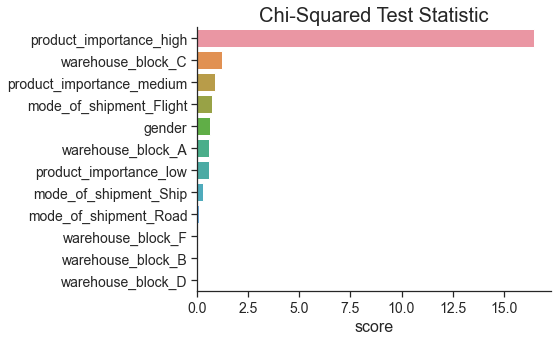

In [140]:
sns.barplot(data=scores, x='score', y=0)
plt.title('Chi-Squared Test Statistic')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [141]:
filtered_score = scores[scores['score']>=2.5]
filtered_score[0].values

array(['product_importance_high'], dtype=object)

In [142]:
features_cat = filtered_score[0].values

Insight:
- Terlihat bahwa dari semua fitur kategorikal, hanya `product_importance_high` yang memiliki relasi terhadap target variable.
- Selain dari fitur tersebut dapat dibuang karena tidak akan membantu banyak dalam memprediksi target dan hanya akan menambah kompleksitas model.

## Feature Importance (Boruta)

Tahap ini dapat dibagi menjadi dua bagian, yaitu sebagai berikut:
- Feature Importance menggunakan RandomForestClassifier, dan
- Feature Ranking menggunakan Boruta

RandomForestClassifier dapat menghitung feature importance masing-masing fitur berdasarkan perhitungan gini impurity pada fitur. Sedangkan Boruta adalah wrapper method dari RandomForestClassifier yang bertujuan untuk menilai kepentingan fitur secara robust.

[Boruta Explained](https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a)

In [143]:
features_num = [col for col in X_train.columns if col not in np.concatenate((labels,ohe.get_feature_names(onehotcats)))]
# features = np.concatenate((features_num, features_cat))
features = features_num
features

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['customer_care_calls',
 'customer_rating',
 'cost_of_the_product',
 'prior_purchases',
 'discount_offered',
 'weight_in_gms',
 'trf_weight_in_gms',
 'trf_prior_purchases',
 'trf_discount_offered',
 'trf_cost_of_the_product']

In [144]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=None, random_state=42)
# rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train[features], y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

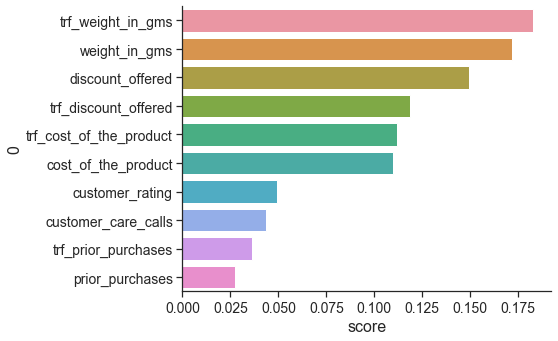

In [145]:
importances = pd.DataFrame(X_train[features].columns)
importances['score'] = rf.feature_importances_
importances = importances.sort_values('score', ascending=False)
sns.barplot(data=importances, x='score', y=0)
plt.tight_layout()
plt.show()

In [146]:
# str(y_train.unique())

In [147]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# estimator = rf.estimators_[5]
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = features,
#                 class_names = str(y_train.unique()),
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

In [148]:
# import graphviz
# graphviz.Source.from_file('tree.dot')

In [149]:
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [150]:
brt = BorutaPy(rf, n_estimators='auto', random_state=42)
brt.fit(np.array(X_train[features]), np.array(y_train))
brt_ranking = brt.ranking_

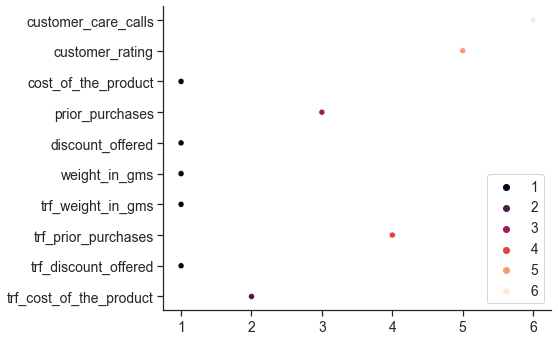

In [151]:
# plt.figure(figsize=(8,8))
sns.scatterplot(y=[col for col in X_train[features].columns.values], x=brt_ranking, hue=brt_ranking, palette='rocket')
plt.tight_layout()
plt.show()

In [152]:
selected_features = {}
for i, col in enumerate(X_train[features].columns):
    if brt_ranking[i] <= 2:
        selected_features[col] = brt_ranking[i]
selected_features

{'cost_of_the_product': 1,
 'discount_offered': 1,
 'weight_in_gms': 1,
 'trf_weight_in_gms': 1,
 'trf_discount_offered': 1,
 'trf_cost_of_the_product': 2}

In [153]:
features = [k for k in selected_features.keys()]
features1 = np.concatenate((features,features_cat))
features1

array(['cost_of_the_product', 'discount_offered', 'weight_in_gms',
       'trf_weight_in_gms', 'trf_discount_offered',
       'trf_cost_of_the_product', 'product_importance_high'], dtype=object)

Insight:
- Fitur numerikal yang memiliki ranking 1 dan 2 diambil, yaitu `cost_of_the_product`, `discount_offered`, `weight_in_gms`, `trf_weight_in_gms`, `trf_discount_offered`, dan `trf_cost_of_the_product`
- `product_importance_high` tetap dipakai sebagai satu-satunya fitur kategorikal pada machine learning model

## Multicollinearity

Multicollinearity adalah permasalahan pada fitur machine learning model yang mana terdapat relasi yang terlalu kuat di antara dua fitur. Hal ini akan mengacaukan prediksi dari machine learning model. Oleh karena itu, fitur yang redundant dapat dibuang salah satunya. Pada tahap ini, Pearson correlation matrix digunakan untuk menyelesaikan permasalah tersebut. Berdasarkan feature importance dari RandomForestClassifier, fitur yang memiliki importance lebih tinggi akan disimpan, dan fitur yang memiliki importance lebih rendah akan dibuang.

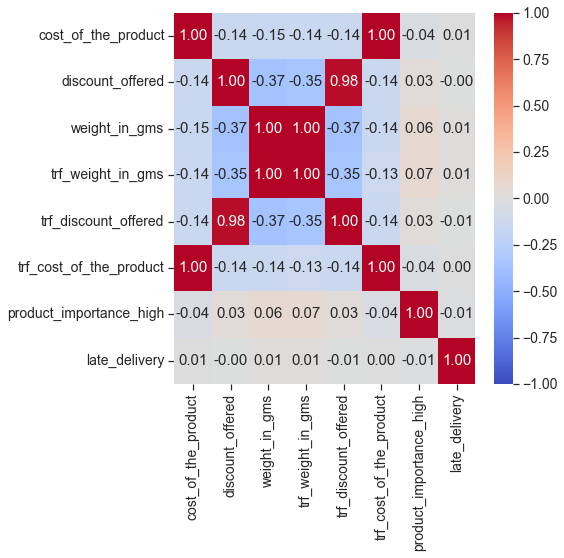

In [154]:
plt.figure(figsize=(8,8))
temp = X_train[features1].copy()
temp['late_delivery'] = y_train.copy()
sns.heatmap(temp.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

In [155]:
to_drop = [
    'id',
    'trf_cost_of_the_product',
#  'prior_purchases',
    'trf_discount_offered',
    'weight_in_gms',
]

features2 = [col for col in features1 if col not in to_drop]

In [156]:
# feat = np.concatenate((features2,features_cat))
feat = features2
feat

['cost_of_the_product',
 'discount_offered',
 'trf_weight_in_gms',
 'product_importance_high']

Kesimpulan:

Hasil dari seluruh tahapan feature selection yang dilewati adalah fitur-fitur yang lolos sebagai berikut:
- `cost_of_the_product`
- `discount_offered`
- `trf_weight_in_gms`
- `product_importance_high`

# Machine Learning Modelling

Pada bagian machine learning modelling ini, adapun beberapa tahapan yang dilakukan untuk mencari model yang terbaik. Tahapannya adalah sebagai berikut:
- Lazypredict untuk mencoba dan mengevaluasi berbagai model classifier dalam waktu yang singkat
- Mengambil beberapa model yang memiliki hasil yang bagus untuk dievaluasi lebih lanjut
- Seleksi model yang kuat untuk diteruskan dengan hyperparameter tuning

Metrics yang dituju untuk project ini adalah:
- 75% untuk class label 'late delivery', dan
- 50% untuk class label 'on-time delivery'

Yang lebih dipentingkan pada kasus ini adalah memprediksi late delivery dibanding on-time delivery, dan oleh karena itu, recall score yang ditetapkan untuk on time delivery lebih rendah daripada late delivery.

## Lazypredict

Lazypredict telah dirun sebelumnya dan terlihat bahwa model tree-based, stacking, bagging, dan boosting lebih unggul.

Note: lazypredict menggunakan versi pandas, sklearn, dan package lainnya, sehingga harus dilakukan pada environment yang berbeda.

In [157]:
# untuk pertama kali
# run code di bawah ini
# dan restart runtime kalau perlu
# baru import

# !pip install lazypredict --user

In [158]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.metrics import recall_score

In [159]:
# clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=recall_score)
# models, predictions = clf.fit(X_train[feat], X_test[feat], y_train, y_test)
# print(models)

## Strong Learners

Pada tahapan ini, model tree-based, stacking, bagging, dan boosting dipilih untuk dievaluasi lebih lanjut melalui cross-validation pada train set dan prediksi pada test set. Seperti yang sudah ditetapkan, recall score menjadi metric utama pada evaluasi.

In [160]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\fnurr\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\fnurr\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\fnurr\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated 

In [161]:
# weak learners
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

log = LogisticRegression()
qda = QuadraticDiscriminantAnalysis()
gnb = GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

estimators = [
    ("LOG", log),
#     ("QDA", qda),
    ("GNB", gnb),
#     ("KNN", knc),
    ("DTC", dtc),
    ("RFC", rfc)
]

In [162]:
dt = DecisionTreeClassifier()
et = ExtraTreeClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
ets = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
# iso = IsolationForest()
rf = RandomForestClassifier()
sta = StackingClassifier(estimators, final_estimator=rf)
vot = VotingClassifier(estimators, voting='soft')
hgbc = HistGradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
lgbm = LGBMClassifier()

models=[
    dt,et,ada,bag,ets,gbc,rf,sta,vot,hgbc,xgb,xgbrf,lgbm
]

## Cross Validation

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score

In [164]:
from sklearn.model_selection import cross_val_score, KFold
def model_evaluation(model, X_train, y_train, scoring='recall_micro', cv=3):
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
    avg_res = abs(np.mean(cv_results))
    return avg_res

In [165]:
results = []
print('CROSS VALIDATED MICRO RECALL SCORES ON TRAINING DATA:\n')
for i, model in enumerate(models):
    result = model_evaluation(model, X_train[feat], y_train)
    print(model,':',result)

CROSS VALIDATED MICRO RECALL SCORES ON TRAINING DATA:

DecisionTreeClassifier() : 0.6388443988916522
ExtraTreeClassifier() : 0.6386153937097117
AdaBoostClassifier() : 0.6681818478018527
BaggingClassifier() : 0.6611306680915878
ExtraTreesClassifier() : 0.6496470899818146
GradientBoostingClassifier() : 0.6804629876580792
RandomForestClassifier() : 0.6485100544290704
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.6414603874562878
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.6496469348292523
HistGrad

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None) : 0.

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:23:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:23:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bytree=None, enable_categorical=False, gamma=None,
                gpu_id=None, importance_type=None, interaction_constraints=None,
                max_delta_step=None, max_depth=None, min_child_weight=None,
                missing=nan, monotone_constraints=None, n_estimators=100,
                n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, scale_pos_weight=None, tree_method=None,
                validate_parameters=None, verbosity=None) : 0.6850119056318674
LGBMClassifier() : 0.66363

In [166]:
results = []
print('CROSS VALIDATED ROC AUC SCORES ON TRAINING DATA:\n')
for i, model in enumerate(models):
    result = model_evaluation(model, X_train[feat], y_train, scoring='roc_auc')
    print(model,':',result)

CROSS VALIDATED ROC AUC SCORES ON TRAINING DATA:

DecisionTreeClassifier() : 0.6339999511938708
ExtraTreeClassifier() : 0.6396152142797052
AdaBoostClassifier() : 0.7271599591767989
BaggingClassifier() : 0.7321593435540326
ExtraTreesClassifier() : 0.7290217785755161
GradientBoostingClassifier() : 0.733189256429798
RandomForestClassifier() : 0.7317797169516771
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.7300661508342835
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.7337683142415906
HistGradientBo

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[08:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[08:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None) : 0.7320634367370339
[08:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[08:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[08:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bytree=None, enable_categorical=False, gamma=None,
                gpu_id=None, importance_type=None, interaction_constraints=None,
                max_delta_step=None, max_depth=None, min_child_weight=None,
                missing=nan, monotone_constraints=None, n_estimators=100,
                n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, scale_pos_weight=None, tree_method=None,
                validate_parameters=None, verbosity=None) : 0.7357125240460313


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


LGBMClassifier() : 0.7339071391921813


## Prediction

In [167]:
test_results = []
print('RECALL SCORES ON TEST DATA:\n')
for model in models:
    model.fit(X_train[feat], y_train)
    y_pred = model.predict(X_test[feat])
    test_results.append(recall_score(y_test, y_pred, average='micro'))
for i, model in enumerate(models):
    print(model, ':', test_results[i])

RECALL SCORES ON TEST DATA:



C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:24:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[08:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


DecisionTreeClassifier() : 0.6466575716234653
ExtraTreeClassifier() : 0.639381537062301
AdaBoostClassifier() : 0.6780354706684857
BaggingClassifier() : 0.6725784447476125
ExtraTreesClassifier() : 0.6589358799454298
GradientBoostingClassifier() : 0.692587539790814
RandomForestClassifier() : 0.6616643929058663
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.6402910413824465
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.6552978626648477
HistGradientBoostingClassifier() : 0.6798544793087767
XGBClassifi

In [168]:
test_results = []
print('ROC AUC SCORES ON TEST DATA:\n')
for model in models:
    model.fit(X_train[feat], y_train)
    y_pred = model.predict(X_test[feat])
    test_results.append(roc_auc_score(y_test, y_pred))
for i, model in enumerate(models):
    print(model, ':', test_results[i])

ROC AUC SCORES ON TEST DATA:



C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype in

[08:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


DecisionTreeClassifier() : 0.6393229760475098
ExtraTreeClassifier() : 0.6305694480336865
AdaBoostClassifier() : 0.6932376145812748
BaggingClassifier() : 0.6603111746195826
ExtraTreesClassifier() : 0.6519351504188011
GradientBoostingClassifier() : 0.7199327080451383
RandomForestClassifier() : 0.656852834318897
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.6613651449969343
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.6587200847230034
HistGradientBoostingClassifier() : 0.6952277437433177
XGBClassif

In [169]:
model = xgbrf
y_pred = model.predict(X_test[feat])

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [170]:
print(classification_report(y_test, y_pred, labels=sorted(model.classes_, reverse=True), target_names=['Late','Ontime']))

              precision    recall  f1-score   support

        Late       0.95      0.49      0.64      1257
      Ontime       0.58      0.97      0.73       942

    accuracy                           0.69      2199
   macro avg       0.77      0.73      0.69      2199
weighted avg       0.79      0.69      0.68      2199



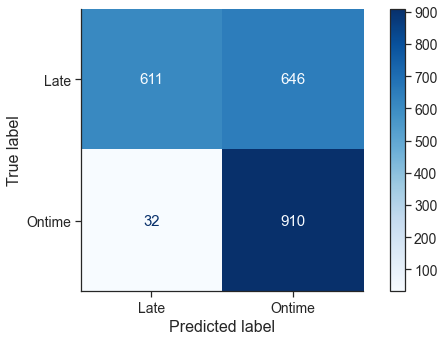

In [171]:
cm = confusion_matrix(y_test, y_pred, labels=sorted(model.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late','Ontime'])
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

Terlihat bahwa skor untuk cross-validation dari train set dan prediksi dari test set sudah best-fit dilihat dari skornya yang serupa. Setelah melihat hasil evaluasi dari strong learners, terlihat bahwa terdapat beberapa model yang memang unggul. Namun sepertinya recall scores yang dituju belum terlalu tepat. Oleh karena itu, beberapa model yang memiliki hasil cenderung baik dan memungkinkan untuk hyperparameter tuning diseleksi lebih lanjut, yaitu model-model di bawah ini:
- XGBRF
- Stacking
- Bagging

Sebagai pengingat, recall score yang dituju adalah:
- 75% untuk late delivery
- 50% untuk on-time delivery

### XGBRF

In [172]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [173]:
model = xgbrf
model

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [174]:
params = dict(
    booster = ['dart'],
    eta = [0.025],
    gamma = [0],
    max_depth = [9],
    min_child_weight = [0.8],
    max_delta_step = [3],
    subsample = [0.7],
    tree_method = ['hist'],
    scale_pos_weight = [1.4],
    random_state = [42],
    n_jobs = [-1],
#     objective = ['binary:logistic'],
#     eval_metric = ['aucpr'],
    reg_lambda = [0.1],
    reg_alpha = [2],
    
#     sample_type = ['uniform'],
#     normalize_type = ['tree'],
#     rate_drop = [0],
#     one_drop = [0],
#     skip_drop = [0]
)

In [175]:
params1 = dict(
    booster = ['dart'],
    eta = [0.025,0.015],
    gamma = [0.01,0.005],
    max_depth = [9,8,7],
    min_child_weight = [0.8,0.75],
    max_delta_step = [3,3.5],
    subsample = [0.7,0.95],
    tree_method = ['hist'],
    scale_pos_weight = [1.4,1.39],
    random_state = [42],
    n_jobs = [-1],
#     objective = ['binary:logistic'],
#     eval_metric = ['aucpr'],
    reg_lambda = [0.1,0.08],
    reg_alpha = [2,1.8],
    
#     sample_type = ['uniform'],
#     normalize_type = ['tree'],
#     rate_drop = [0],
#     one_drop = [0],
#     skip_drop = [0]
)

In [176]:
gs = GridSearchCV(estimator=model, param_grid=params, verbose=3, cv=3, n_jobs=-1, scoring='recall_micro')
model1 = gs.fit(X_train[feat], y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [177]:
y_pred1 = model1.predict(X_test[feat])

C:\Users\fnurr\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [178]:
print(model1.best_estimator_)
print(model1.best_params_)
print(model1.scorer_, abs(model1.best_score_))
print(roc_auc_score(y_test, y_pred1))

XGBRFClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, eta=0.025,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', max_delta_step=3, max_depth=9,
                min_child_weight=0.8, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=-1, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_state=42,
                reg_alpha=2, reg_lambda=0.1, scale_pos_weight=1.4,
                subsample=0.7, tree_method='hist', validate_parameters=1,
                verbosity=None)
{'booster': 'dart', 'eta': 0.025, 'gamma': 0, 'max_delta_step': 3, 'max_depth': 9, 'min_child_weight': 0.8, 'n_jobs': -1, 'random_state': 42, 'reg_alpha': 2, 'reg_lambda': 0.1, 'scale_pos_weight': 1.4, 'subsample': 0.7, 'tree_method': 'hist'}
make_scorer(recall_score, pos_label=None, average=micro) 0.6382752605050309
0.63969

In [179]:
print(classification_report(y_test, y_pred1, labels=sorted(model1.classes_, reverse=True), target_names=['Late','Ontime']))

              precision    recall  f1-score   support

        Late       0.68      0.75      0.71      1257
      Ontime       0.61      0.53      0.57       942

    accuracy                           0.65      2199
   macro avg       0.65      0.64      0.64      2199
weighted avg       0.65      0.65      0.65      2199



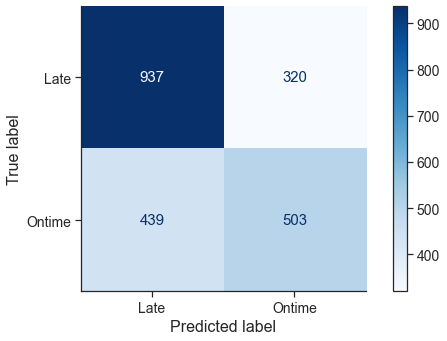

In [180]:
cm = confusion_matrix(y_test, y_pred1, labels=sorted(model1.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late','Ontime'])
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

### Stacking

In [181]:
# weak learners
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

log = LogisticRegression()
# qda = QuadraticDiscriminantAnalysis()
gnb = GaussianNB()
# knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

estimators = [
    ("LOG", log),
#     ("QDA", qda),
    ("GNB", gnb),
    ("DTC", dtc),
    ("RFC", rfc)
]

In [182]:
final_estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=400, random_state=42)

In [183]:
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# stack.fit(X_train[feat], y_train)

In [184]:
params = dict(
#     LOG__penalty = ['l1', 'l2', 'elasticnet'],
    LOG__C = [0.7,0.8],
#     QDA__reg_param = [0.2,0.5],
    GNB__var_smoothing = np.logspace(-8,-9, num=4),
    DTC__max_depth = [7,9],
#     DTC__min_samples_split = [0.5,0.7],
#     RFC__n_estimators = [120,150,200],
    RFC__max_depth = [5,7],
#     RFC__min_samples_split = [0.5,0.7],
)

In [185]:
gs = GridSearchCV(estimator=stack, param_grid=params, verbose=2, cv=5, n_jobs=-1, scoring='recall_micro')
model2 = gs.fit(X_train[feat], y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [186]:
y_pred2 = model2.predict(X_test[feat])

In [187]:
print(model2.best_estimator_)
print(model2.best_params_)
print(model2.scorer_, abs(model2.best_score_))
print(roc_auc_score(y_test, y_pred2))

StackingClassifier(estimators=[('LOG', LogisticRegression(C=0.8)),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier(max_depth=7)),
                               ('RFC', RandomForestClassifier(max_depth=7))],
                   final_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                      learning_rate=0.1,
                                                      n_estimators=400,
                                                      random_state=42))
{'DTC__max_depth': 7, 'GNB__var_smoothing': 1e-09, 'LOG__C': 0.8, 'RFC__max_depth': 7}
make_scorer(recall_score, pos_label=None, average=micro) 0.6456681419334727
0.6555125691034664


In [188]:
print(classification_report(y_test, y_pred2, labels=sorted(model2.classes_, reverse=True), target_names=['Late','Ontime']))

              precision    recall  f1-score   support

        Late       0.71      0.69      0.70      1257
      Ontime       0.60      0.63      0.61       942

    accuracy                           0.66      2199
   macro avg       0.65      0.66      0.65      2199
weighted avg       0.66      0.66      0.66      2199



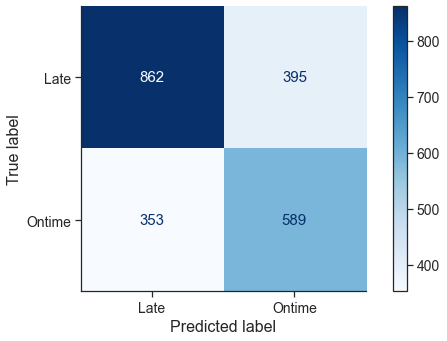

In [189]:
cm = confusion_matrix(y_test, y_pred2, labels=sorted(model2.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late','Ontime'])
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

### Bagging

In [190]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()

In [191]:
params = dict(
    base_estimator = [DecisionTreeClassifier(class_weight={0: 1, 1: 1.4}, random_state=42)],
    n_estimators = [1500],
    max_samples = [0.5],
    max_features = [0.5],
#     n_jobs = [-1],
    random_state = [42],
)

In [192]:
gs = GridSearchCV(estimator=bag, param_grid=params, verbose=2, cv=3, n_jobs=-1, scoring='recall')
model3 = gs.fit(X_train[feat], y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [193]:
y_pred3 = model3.predict(X_test[feat])

In [194]:
print(model3.best_estimator_)
print(model3.best_params_)
print(model3.scorer_, abs(model3.best_score_))
print(roc_auc_score(y_test, y_pred3))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                      1: 1.4},
                                                        random_state=42),
                  max_features=0.5, max_samples=0.5, n_estimators=1500,
                  random_state=42)
{'base_estimator': DecisionTreeClassifier(class_weight={0: 1, 1: 1.4}, random_state=42), 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 1500, 'random_state': 42}
make_scorer(recall_score, average=binary) 0.7166169154228855
0.6326621872925628


In [195]:
print(classification_report(y_test, y_pred3, labels=sorted(model3.classes_, reverse=True), target_names=['Late','Ontime']))

              precision    recall  f1-score   support

        Late       0.67      0.75      0.71      1257
      Ontime       0.61      0.51      0.56       942

    accuracy                           0.65      2199
   macro avg       0.64      0.63      0.63      2199
weighted avg       0.65      0.65      0.64      2199



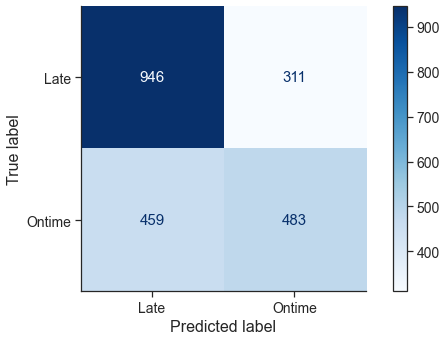

In [196]:
cm = confusion_matrix(y_test, y_pred3, labels=sorted(model3.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late','Ontime'])
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

Kesimpulan:

Dari ketiga model yang melalui hyperparameter tuning, terlihat bahwa XGBRF paling unggul, yang mana memiliki recall score sebagai berikut:
- 75% untuk late delivery
- 53% untuk on-time delivery

Oleh karena itu, model yang final adalah XGBRF dengan parameter sebagai berikut:

`base_score=0.5, booster='dart', colsample_bylevel=1, colsample_bytree=1, enable_categorical=False, eta=0.025, gamma=0, gpu_id=-1, importance_type=None, interaction_constraints='', max_delta_step=3, max_depth=9, min_child_weight=0.8, missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=-1, num_parallel_tree=100, objective='binary:logistic', predictor='auto', random_state=42, reg_alpha=2, reg_lambda=0.1, scale_pos_weight=1.4, subsample=0.7, tree_method='hist', validate_parameters=1, verbosity=None`

# Business Recommendation

# Cluster Analysis

In [197]:
from sklearn.cluster import KMeans

In [282]:
f = ['cost_of_the_product','weight_in_gms']

In [283]:
new_X = X_train[f].copy()

[507.2723207291115, 338.9145571575024, 182.93377024961566, 147.51344689293057, 120.28716766408634, 104.86217369778413, 91.18941388210446, 81.14782845944845, 72.75773438997979]


<AxesSubplot:>

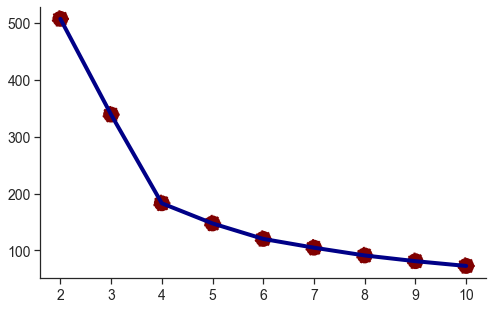

In [284]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_X.values)
    inertia.append(kmeans.inertia_)

print(inertia)

plt.figure(figsize=(8,5))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [285]:
l = [i for i in range(2,11)]
l = pd.DataFrame(l)
l['inertia'] = inertia
l = l.set_index(0)
l['pct_change'] = l['inertia'].pct_change()
l

,inertia,pct_change
0,,
2,507.272321,NaN
3,338.914557,-0.331888
4,182.933770,-0.460236
5,147.513447,-0.193624
6,120.287168,-0.184568
7,104.862174,-0.128235
8,91.189414,-0.130388
9,81.147828,-0.110118
10,72.757734,-0.103393


In [286]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(new_X.values)

KMeans(n_clusters=4, random_state=42)

In [287]:
new_X['cluster'] = kmeans.labels_

In [288]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

<AxesSubplot:xlabel='weight_in_gms', ylabel='cost_of_the_product'>

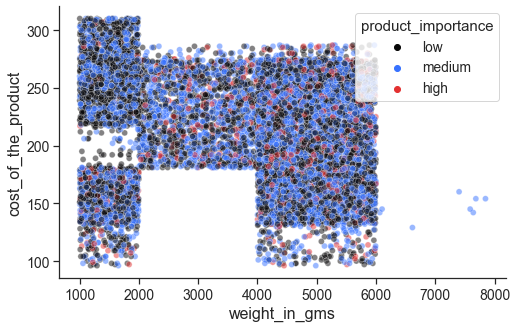

In [311]:
sns.scatterplot(data=df, y='cost_of_the_product', x='weight_in_gms', 
                hue='product_importance', alpha=0.5, palette=[black,blue,red])

In [291]:
df.groupby('product_importance').describe()

customer_care_calls                                              customer_rating                                              cost_of_the_product                                                          prior_purchases                                               discount_offered                                                  weight_in_gms                                                                     late_delivery                                             
                                 count      mean       std  min  25%  50%  75%  max           count      mean       std  min  25%  50%  75%  max               count        mean        std   min    25%    50%    75%    max           count      mean       std  min  25%  50%  75%   max            count       mean        std  min  25%  50%   75%   max         count         mean          std     min      25%     50%      75%     max         count      mean       std  min  25%  50%  75%  max
product_importance                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
high                             948.0  3.872363  1.048736  2.0  3.0  4.0  5.0  7.0           948.0  2.993671  1.408963  1.0  2.0  3.0  4.0  5.0               948.0  203.871308  46.698931  96.0  165.0  205.5  243.0  307.0           948.0  3.657173  1.972242  2.0  2.0  3.0  4.0  10.0            948.0  14.666667  17.341245  1.0  4.0  7.0  18.0  65.0         948.0  4005.551688  1478.101488  1007.0  2848.75  4408.0  5204.00  6000.0         948.0  0.649789  0.477288  0.0  0.0  1.0  1.0  1.0
low                             5297.0  4.110251  1.174664  2.0  3.0  4.0  5.0  7.0          5297.0  2.983576  1.424429  1.0  2.0  3.0  4.0  5.0              5297.0  212.059845  48.627127  96.0  171.0  218.0  253.0  310.0          5297.0  3.528224  1.369033  2.0  3.0  3.0  4.0  10.0           5297.0  13.043043  15.842647  1.0  4.0  7.0  10.0  65.0        5297.0  3497.488956  1672.770052  1001.0  1718.00  4032.0  5011.00  6000.0        5297.0  0.592788  0.491361  0.0  0.0  1.0  1.0  1.0
medium                          4754.0  4.028607  1.116985  2.0  3.0  4.0  5.0  7.0          4754.0  2.997686  1.402635  1.0  2.0  3.0  4.0  5.0              4754.0  209.382415  47.576779  96.0  169.0  213.0  250.0  310.0          4754.0  3.593605  1.580763  2.0  3.0  3.0  4.0  10.0           4754.0  13.483172  16.359387  1.0  4.0  7.0  10.0  65.0        4754.0  3712.050484  1606.523994  1001.0  1924.50  4203.0  5066.75  7846.0        4754.0  0.590450  0.491802  0.0  0.0  1.0  1.0  1.0

In [292]:
df.groupby('product_importance')[cats].describe()

warehouse_block                  mode_of_shipment                    product_importance                      gender                 
                             count unique top  freq            count unique   top  freq              count unique     top  freq  count unique top  freq
product_importance                                                                                                                                     
high                           948      5   F   303              948      3  Ship   627                948      1    high   948    948      2   M   478
low                           5297      5   F  1776             5297      3  Ship  3602               5297      1     low  5297   5297      2   F  2652
medium                        4754      5   F  1587             4754      3  Ship  3233               4754      1  medium  4754   4754      2   F  2423

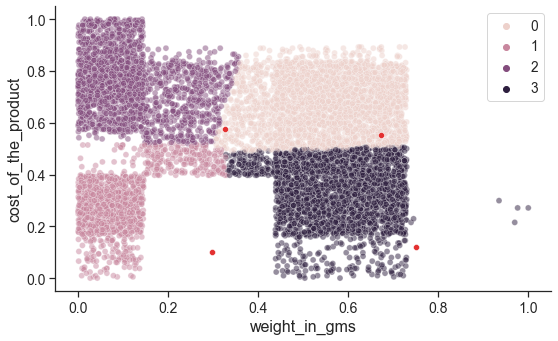

In [295]:
sns.scatterplot(data=new_X, y='cost_of_the_product', x='weight_in_gms', 
                hue='cluster', alpha=0.5)
sns.scatterplot(data=cluster_centers, x=0, y=1, color=red)
plt.tight_layout()
plt.show()

In [297]:
new_X = X_train[f].copy()

In [315]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)
# ac = AgglomerativeClustering(n_clusters=None, distance_threshold=30)
ac.fit(new_X.values)

AgglomerativeClustering(n_clusters=4)

In [316]:
new_X['cluster'] = ac.labels_

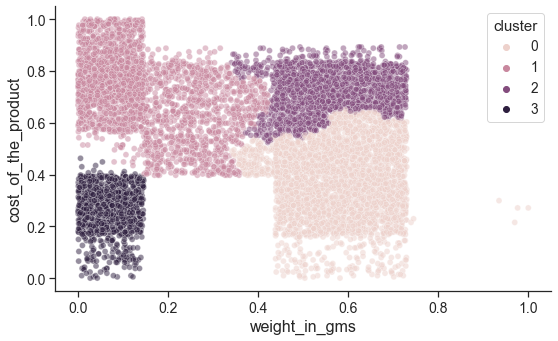

In [317]:
sns.scatterplot(data=new_X, y='cost_of_the_product', x='weight_in_gms', 
                hue='cluster', alpha=0.5)
plt.tight_layout()
plt.show()